<a href="https://www.kaggle.com/code/chiemelachinedum/eda-for-the-possibilities-of-heart-attack?scriptVersionId=124071074" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #00308F; text-align: center; line-height: 1.25;"><b> 🏬 EDA for the possibilities of heart attack 💔<span style="color: #000000"></span></b><br><span style="color: #00308F; font-size: 24px">(supported by mind maps)</span></h1>
<hr>

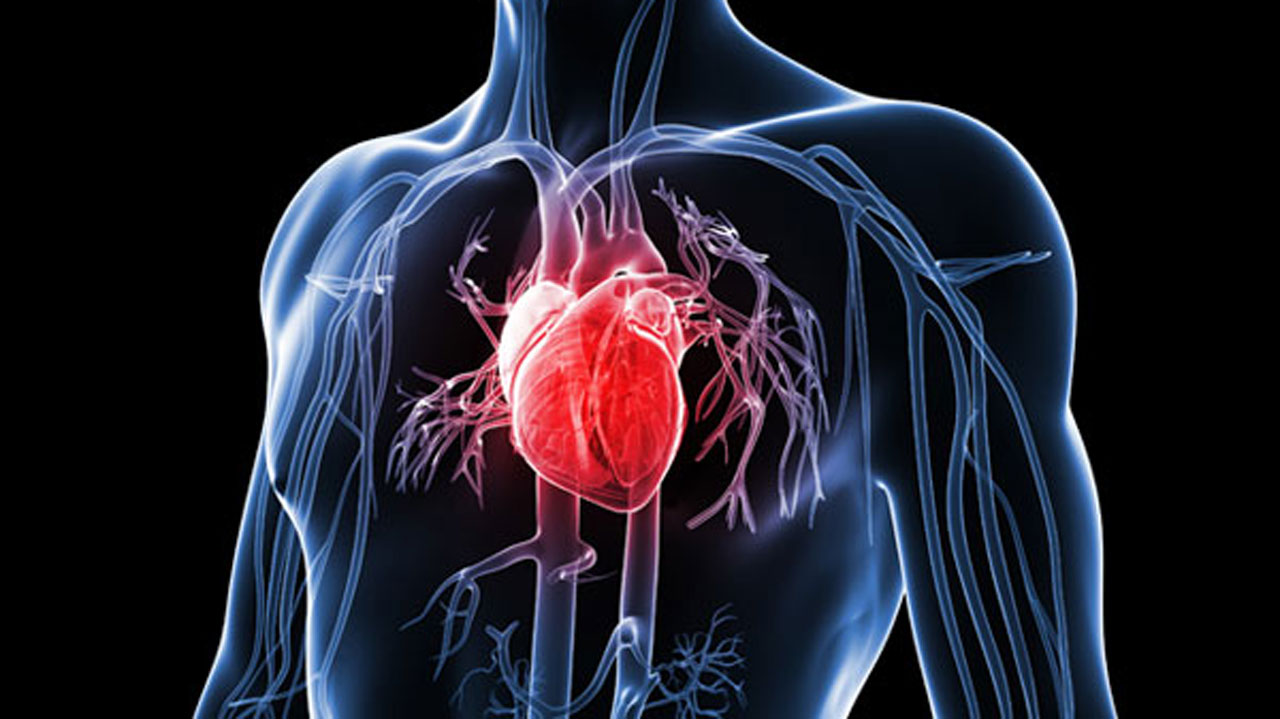

Source: [VENKAT MURALI](https://www.kaggle.com/venky12347)

In [1]:
"""
CSS/HTML settings to allow some nice things like setting styles on 
section, sub-section, sub-sub-section, and sub-sub-sub-section headers.

All of this is possible with the help of the HTML and Javascript magic from IPython.core.display
"""
from IPython.core.display import display, HTML, Javascript

html_css_settings = """
<!DOCTYPE html>
<html lang="en">
    <head>
    <style>
    .toc h2{
        color: #3f4d63;
        font-weight: 600;
        font-family: 'Times New Roman', serif;
        font-size: 28px;
        margin-bottom: 4px;
    }
    
    .toc ol li{
        list-style:none;
        line-height:normal;
        }
     
    .toc li{
        color: #235f83;
        font-weight: 600;
        font-family: 'Times New Roman', serif;
        font-size: 17px;
        margin-bottom: 2px;
    }

    .toc ol ol li{
        color: #4d4d4d;
        font-weight: 400;
        font-size: 15px;
        font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
        margin-top: 0px;
        margin-bottom: 0px;
    } 
    
    .section_title{
        background-color: #506f86;
        color: white;
        font-family: Helvetica;
        font-size: 25px;
        padding: 6px 12px;
        margin-bottom: 5px;
    }
    .subsection_title{
        background: #2f3c4f;
        color: white;
        font-family: Helvetica;
        font-size: 21px;
        padding: 6px 12px;
        margin-bottom: 0px;
    }
    .subsubsection_title{
        background: #de703c;
        color: white;
        font-family: Helvetica;
        font-size: 18px;
        padding: 20px;
        margin: 20px;
        text-align: center;
        font-weight: bold;
        text-decoration: underline;
        border: 2px dotted white;
    }
    .subsubsubsection_title{
        background: #f0fbff;
        color: black;
        font-family: Helvetica;
        font-size: 19px;
        padding: 6px 12px;
        margin-bottom: 0px;
        font-weight: bold;
    }
    </style>
    </head>
    <body>
    </body>
</html>
"""

HTML(html_css_settings)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

import gc
import random

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv


<a id='ToC'></a>

----------

# <div class="section_title">Table of contents
<font size="4">
   
- [Introduction](#introduction)
- [Summary](#Summary)
- [Data Dictionary](#dictionary)
- [Data Definition](#definition)
    - [Python mind map](#python)
    - [Pandas mind map](#pandas)
- [Data Cleaning](#cleaning)
    - [Data Cleaning mind map](#cleaningmap)
- [Descriptive analysis](#descriptive)
- [Data Visualizations](#visuals)
    - [Data visualization mind map](#visualsmap)
    - [1. What is the distribution of the population of people with heart attacks](#1)
    - [2. What gender is most likely to have a heart attack?](#2)
    - [3. Does high cholesterol level determine heart attack?](#3)
    - [4. Are older people with high cholesterol levels more susceptible to heart attacks?](#4)
    - [5. Is heart attack more common with the young below 40 or the older ones above 40?](#5)
    - [6. Does chest pain always lead to a heart attack later in future?](#6)
    - [7. What other attributes could cause a heart attack?](#7)
        - [7a. Thalessemia and Target](#7a)
        - [7b. Slope and old peak](#7b)
- [Additional Mind Maps](#others)
- [Conclusion](#conclusion)
- [References](#references)
- [Credits and Thanks](#credits)

[](http://)

<a id='introduction'></a>

----------

# <div class="subsection_title">Introduction

<font size="4">
    
In my country, **Nigeria**, according to the latest **World Health Organization (WHO)** data published in **2020 Coronary Heart Disease**, deaths reached **61,374** or **4.14%** of total deaths. The age-adjusted Death Rate is 100.91 per 100,000 population ranks Nigeria **107th** in the world. One of the first signs of **coronary heart disease** is a heart attack.
  
A **heart attack** is an urgent medical situation. A blood clot usually causes a heart attack by obstructing the heart's blood supply. Without blood, tissue loses oxygen and dies.
   
The aim of this submission and notebook includes the following:
    
* To explore the causes and possibilities of a large number of individuals, especially in my country having a heart attack
    
* To utilize Exploratory Data Analysis methods to show these possibilities

* To present my final project as a **KaggleX mentee 2023** which could contribute to the health check of every Kaggler or anyone that looks through this

* To show resources and materials of my learning journey in form of mind maps (thanks to Mani Sarkar for the introduction to mind mapping)

This notebook will **analyze these questions**, but not limited to the following:

* What is the distribution of the population of people with heart attacks?

* What gender is most likely to have a heart attack?

* Does high cholesterol level determine heart attack?

* Are older people with high cholesterol levels more susceptible to heart attacks?

* Is heart attack more common with the young below 40 or the older ones above 40?

* Does chest pain always lead to a heart attack later in future?

* What other correlations could cause a heart attack? (Several subtopics stream from this question)

**Medical/technical words** are simply explained to clarify every visual.

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='Summary'></a>

----------

# <div class="subsection_title">Summary

<font size="4">

* The **Cleveland dataset** was defined, cleaned and analysed to answer pertinent questions that are vital to the human life as regards the possibility of heart attack.

* This dataset stemmed from a survey donated on **7/1/1988**. However, this could serve as a template for learning why individuals could have a heart attack

* It is worthy of note that there are **links to my mindmaps** in major sections which highlight what I have learnt as a mentee in the **KaggleX BIPOC mentorship programme**. Learnings were majorly from **KaggleLearn, Coursera and GoogleCloud**. 

* The metrics from the dataset shows a distribution of more males to females how relatable they are to possibly have a heart attack.

* More analysis is found in the [Data visualization section](#visuals)

* To know more about the closing discussions, please review the <a href=#Conclusion>Conclusion</a> and [Credit and Thanks](#credits) sections -- as always the <a href='#ToC'>Table of Contents</a> to make it simple to navigate through this notebook.

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='dictionary'></a>

----------

# <div class="subsection_title">Data Dictionary

<html>
<style>
   
table, th, td {
  border:1px solid black;
}    
</style>
<body>

<table style="width:95%;font-size:16px">
  <tr>
    <th style="width:2%">S/N</th>
    <th style="width:10%">Attributes</th>
    <th style="width:40%">Description</th>
    <th>Codes</th>
  </tr>
  <tr>
    <td>1</td>
    <td>age</td>
    <td>age in years</td>
    <td>-</td>
  </tr>
  <tr>
    <td>2</td>
    <td>sex</td>
    <td>gender</td>
    <td>1= male, 0= female</td>
  </tr>
  <tr>
    <td>3</td>
    <td>cp</td>
    <td>chest pain</td>
    <td>0= asymptomatic, 1= typical angina, 2= atypical angina, 3= non-anginal pain</td>
  </tr>
  <tr>
    <td>4</td>
    <td>trestbps</td>
    <td>resting blood pressure (in mmHg on admission to the hospital</td>
    <td>-</td>
  </tr>
  <tr>
    <td>5</td>
    <td>chol</td>
    <td>serum cholesterol in mg/dl</td>
    <td>-</td>
  </tr>
  <tr>
    <td>6</td>
    <td>fbs</td>
    <td>fasting blood sugar > 120mg/dl(normal level)</td>
    <td>0= normal fbs, 1= high fbs</td>
  </tr>
  <tr>
    <td>7</td>
    <td>restecg</td>
    <td>resting electrocardiographic results</td>
    <td>0= normal, 1= having ST-T wave abnormality, 2= probable or definite left ventriculat hypertrophy</td>
  </tr>
  <tr>
    <td>8</td>
    <td>thalach</td>
    <td>maximum heart rate achieved</td>
    <td>-</td>
  </tr>
  <tr>
    <td>9</td>
    <td>exang</td>
    <td>exercise induced angina</td>
    <td>0= no exang, 1= has exang</td>
  </tr>
  <tr>
    <td>10</td>
    <td>oldpeak</td>
    <td>ST depression induced by exercise relative to rest</td>
    <td>-</td>
  </tr>
  <tr>
    <td>11</td>
    <td>slope</td>
    <td>slope of the peak exercise ST segment</td>
    <td>1= upsloping, 2 = flat, 3= downsloping</td>
  </tr>
  <tr>
    <td>12</td>
    <td>ca</td>
    <td>number of major vessels (0-3) coloured by flouroscopy</td>
    <td>-</td>
  </tr>
  <tr>
    <td>13</td>
    <td>thal</td>
    <td>thalessemia; a hereditary blood disorder with an abnormal hemoglobin level</td>
    <td>0= null(dropped off from previous dataset), 1= fixed defect(no blood flow in some part of the heart), 2= normal blood flow, 3= reversable defect(a blood flow is observed but it is not normal</td>
  </tr>
  <tr>
    <td>14</td>
    <td>target</td>
    <td>Indicative of presence or absence of heart attack</td>
    <td>0= no heart attack, 1= there is heart attack</td>
   </tr>
</table>

</body>
</html>


<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

# <a id='definition'></a>

----------

# <div class="subsection_title">Data Definition

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">In a bid to know the basics of **data science**, I partook in online courses on Python and Pandas by **KaggleLearn** which provided me with an in-depth understanding of several topics spanning from the history of Python to using its functions, creating, reading, and writing with Python, amidst others. Please click the links to my mind maps on Python and Pandas below

<a id='python'></a>

# <div class="subsubsection_title"><a href= "http://bitly.ws/AvE7" style = "color: white">Python mind map<a>

<a id='pandas'></a>

# <div class="subsubsection_title"><a href= "http://bitly.ws/AvEz" style = "color: white">Pandas mind map<a>

In [3]:
heart_data = pd.read_csv("/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv")

In [4]:
shape = heart_data.shape
display(f"(Number of rows, Number of columns) = ", shape)

'(Number of rows, Number of columns) = '

(303, 14)

In [5]:
print("There are two types of data that exist in this dataset - integer and float")
types = heart_data.dtypes
display(types)

There are two types of data that exist in this dataset - integer and float


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
print("Look at a preview of the dataset being analysed")
# Have a glimpse of my data - the first 10 rows of the heart_data
display(heart_data.head(10))

Look at a preview of the dataset being analysed


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='cleaning'></a>

----------

# <div class="subsection_title">Data Cleaning

<font size="4">

Having taken a peek on the data, it is important to clean every inconsistency of data for a good data quality. It plays a significant part in exploratory data analysis as it ensures accuracy and better representation of data in visualizations.

This involves the following major steps in cleaning:

1. Errors
1. Missing values
1. Duplicated values
1. Outliers


<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">In my data science journey, I saw the importance of preparing data by cleaning it for its high quality. Thus, I took an online course on Data cleaning with Kaggle Learn. Below is the link to my mind map on Data cleaning. Please check it out.

<a id='cleaningmap'></a>

# <div class="subsubsection_title"><a href= "http://bitly.ws/ABaB" style = "color: white">Data Cleaning mind map<a>

In [7]:
# Count all the missing values in the dataset
print("These are the missing values for each attribute.")
display(heart_data.isna().sum())

These are the missing values for each attribute.


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">There are **no missing values** in the dataset

In [8]:
# Count the duplicated data 
print("This is the total number of duplicated row in the dataset")
display(sum(heart_data.duplicated()))

This is the total number of duplicated row in the dataset


1

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">Only **one row has a duplicate**, which counts for only about 0.3% of the whole dataset. Dropping this duplicate will be significant in not contaminiating the visualizations

In [9]:
#Identify the row that is duplicated
print("The duplicate row has been removed")
heart_data[heart_data.duplicated()]
pd.DataFrame(heart_data.drop_duplicates())

The duplicate row has been removed


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">**Row 164** is identified as a duplicated row and has been dropped becuase it is a duplicate row. The dataset now has **302 rows**, instead of 303 rows.

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">In this analysis, outliers will not need to be removed as there is no legitimate reason to do so. Also, there are no suspicious measurements that are unlikely to be part of real data. 

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='descriptive'></a>

----------

# <div class="subsection_title">Descriptive Analysis

<font size="4">

This analysis describes the data with numerical calculations which shows measures of centrality and variability.
 
Descriptive analysis also generates a high-level summary of the attributes of the given column. It is type-aware, meaning that its output changes based on the data type of the input.

In [10]:
print("It is worthwhile to spend some time reviewing findings from a quick look at the data.")
display(heart_data.describe())

It is worthwhile to spend some time reviewing findings from a quick look at the data.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">The age group of this analysis is between **29-77 years** and the mean age is about **54.37** which indicates that elderly people tend to be more careful about heart disease than any other group.
    

In [11]:
# Convert variables to a more human readable form for a more effective analysis
print("I have converted all the attributes of the dataset to a more human-readable form")
heart_data["sex"]= heart_data["sex"].replace({0: "female", 1: "male"})
heart_data["cp"]= heart_data["cp"].replace({0: "asymptomatic", 1: "atypical angina", 2:"non-typical angina", 3: "typical angina"})
heart_data["fbs"]= heart_data["fbs"].replace({0: "normal fbs", 1: "high fbs"})
heart_data["restecg"]= heart_data["restecg"].replace({0: "normal", 1: "ST-T wave abnormality", 2: "probable LVH"})
heart_data["exang"]= heart_data["exang"].replace({0: "no exang", 1: "exang"})
heart_data["slope"]= heart_data["slope"].replace({0: "downsloping", 1: "flat", 2: "upsloping"})
heart_data["thal"]= heart_data["thal"].replace({0: "null", 1: "fixed defect", 2: "normal blood flow", 3: "reversible defect"})
heart_data["target"]= heart_data["target"].replace({0: "no heart attack", 1: "heart attack"})
display(heart_data)

I have converted all the attributes of the dataset to a more human-readable form


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,typical angina,145,233,high fbs,normal,150,no exang,2.3,downsloping,0,fixed defect,heart attack
1,37,male,non-typical angina,130,250,normal fbs,ST-T wave abnormality,187,no exang,3.5,downsloping,0,normal blood flow,heart attack
2,41,female,atypical angina,130,204,normal fbs,normal,172,no exang,1.4,upsloping,0,normal blood flow,heart attack
3,56,male,atypical angina,120,236,normal fbs,ST-T wave abnormality,178,no exang,0.8,upsloping,0,normal blood flow,heart attack
4,57,female,asymptomatic,120,354,normal fbs,ST-T wave abnormality,163,exang,0.6,upsloping,0,normal blood flow,heart attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,asymptomatic,140,241,normal fbs,ST-T wave abnormality,123,exang,0.2,flat,0,reversible defect,no heart attack
299,45,male,typical angina,110,264,normal fbs,ST-T wave abnormality,132,no exang,1.2,flat,0,reversible defect,no heart attack
300,68,male,asymptomatic,144,193,high fbs,ST-T wave abnormality,141,no exang,3.4,flat,2,reversible defect,no heart attack
301,57,male,asymptomatic,130,131,normal fbs,ST-T wave abnormality,115,exang,1.2,flat,1,reversible defect,no heart attack


<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='visuals'></a>
​
----------
​
# <div class="subsection_title">Data Visualizations

In [12]:
sns.set(style="darkgrid", font_scale=1.75)

# prettify plots
plt.rcParams['figure.figsize'] = [20, 9]
plt.rcParams['figure.dpi'] = 400

%matplotlib inline

# Increase the quality and resolution of our charts so we can copy/paste or just
# directly save from here.
# See:
# https://ipython.org/ipython-doc/3/api/generated/IPython.display.html
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

## You can also just do this in Colab/Jupyter, some "magic":
%config InlineBackend.figure_format='retina'

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">I learnt data visualizations on **KaggleLearn**, which spanned from importing the **data visualization** packages to different types of charts and graphs. They include **line charts**, **bar charts**, **scatter plots**, **distributions** and **heat maps**. This course greatly aided the analysis done in this notebook. Below is the link to my mind map on Data visualization.

<a id='visualsmap'></a>

# <div class="subsubsection_title"><a href= "https://www.xmind.net/m/Ud7Pr5" style = "color: white">Data Visualization mind map<a>

<a id='1'></a>

# <div class="subsubsubsection_title">1. What is the distribution of the population of people with heart attacks?

In [13]:
heart_data['target'].value_counts()
d=[138, 165]
lab=['no heart attack', 'heart attack']

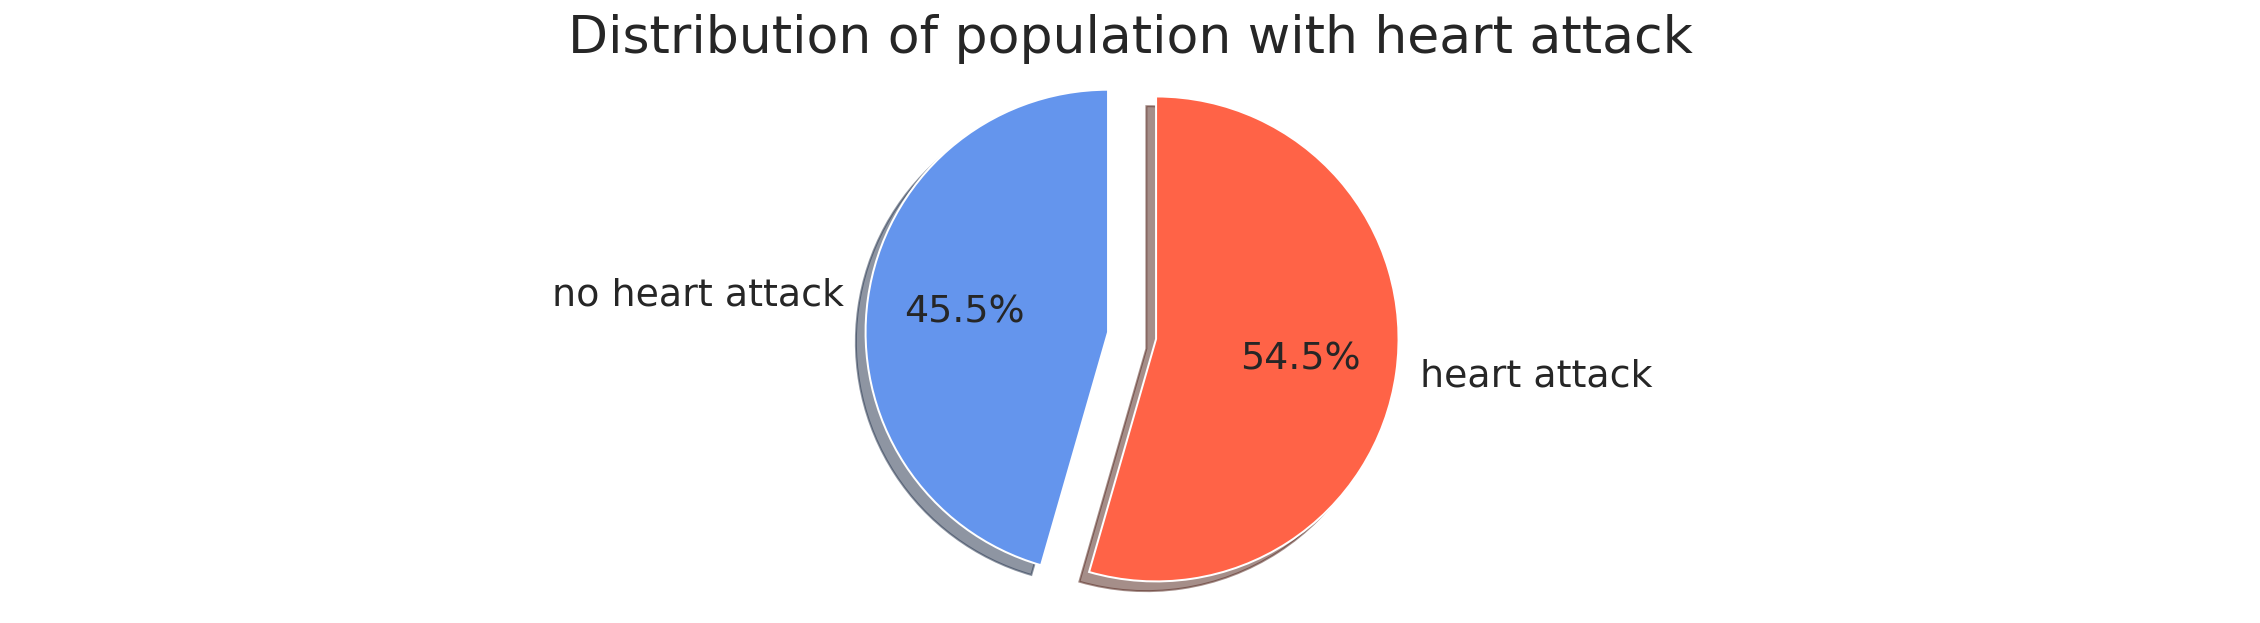

In [14]:
explode = (0, 0.2)
fig = plt.subplots(1,1, figsize=(20,5))
plt.title('Distribution of population with heart attack', fontsize = 26)
plt.pie(d,labels=lab, explode=explode,  autopct='%1.1f%%', shadow=True, startangle=90, colors=['cornflowerblue', 'tomato'], textprops={'fontsize': 19}) 
plt.axis("equal")
plt.show()

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">**Almost half** of the participants in this dataset have a high possibility of heart attack at **54.5%**. This also indicates that there is no imbalanced value issue in the target variable.
    
 

<a id='2'></a>

# <div class="subsubsubsection_title">2. What gender is most likely to have a heart attack?

In [15]:
# calculate the percentage of each gender with and without heart attack
male_counts = heart_data.loc[heart_data['sex'] == 'male', 'target'].value_counts(normalize=False)
female_counts = heart_data.loc[heart_data['sex'] == 'female', 'target'].value_counts(normalize=False)

In [16]:
def annotate_percent(ax, column, no_of_col_cat, no_hue_cat):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    
    for i in range(no_of_col_cat):
        total = column.value_counts().values[i]        
        for j in range(no_hue_cat):
            percentage = '{:.1f}%'.format(100 * a[(j*no_of_col_cat + i)]/total)
            x = patch[(j*no_of_col_cat + i)].get_x() + patch[(j*no_of_col_cat + i)].get_width() / 1.8 - 0.07
            y = patch[(j*no_of_col_cat + i)].get_y() + patch[(j*no_of_col_cat + i)].get_height() 
            
            print(x, y)
            ax.annotate(percentage, (x, y), size = 17)

-0.2477777777777778 93
0.15222222222222223 114
0.7522222222222223 72
1.152222222222222 24


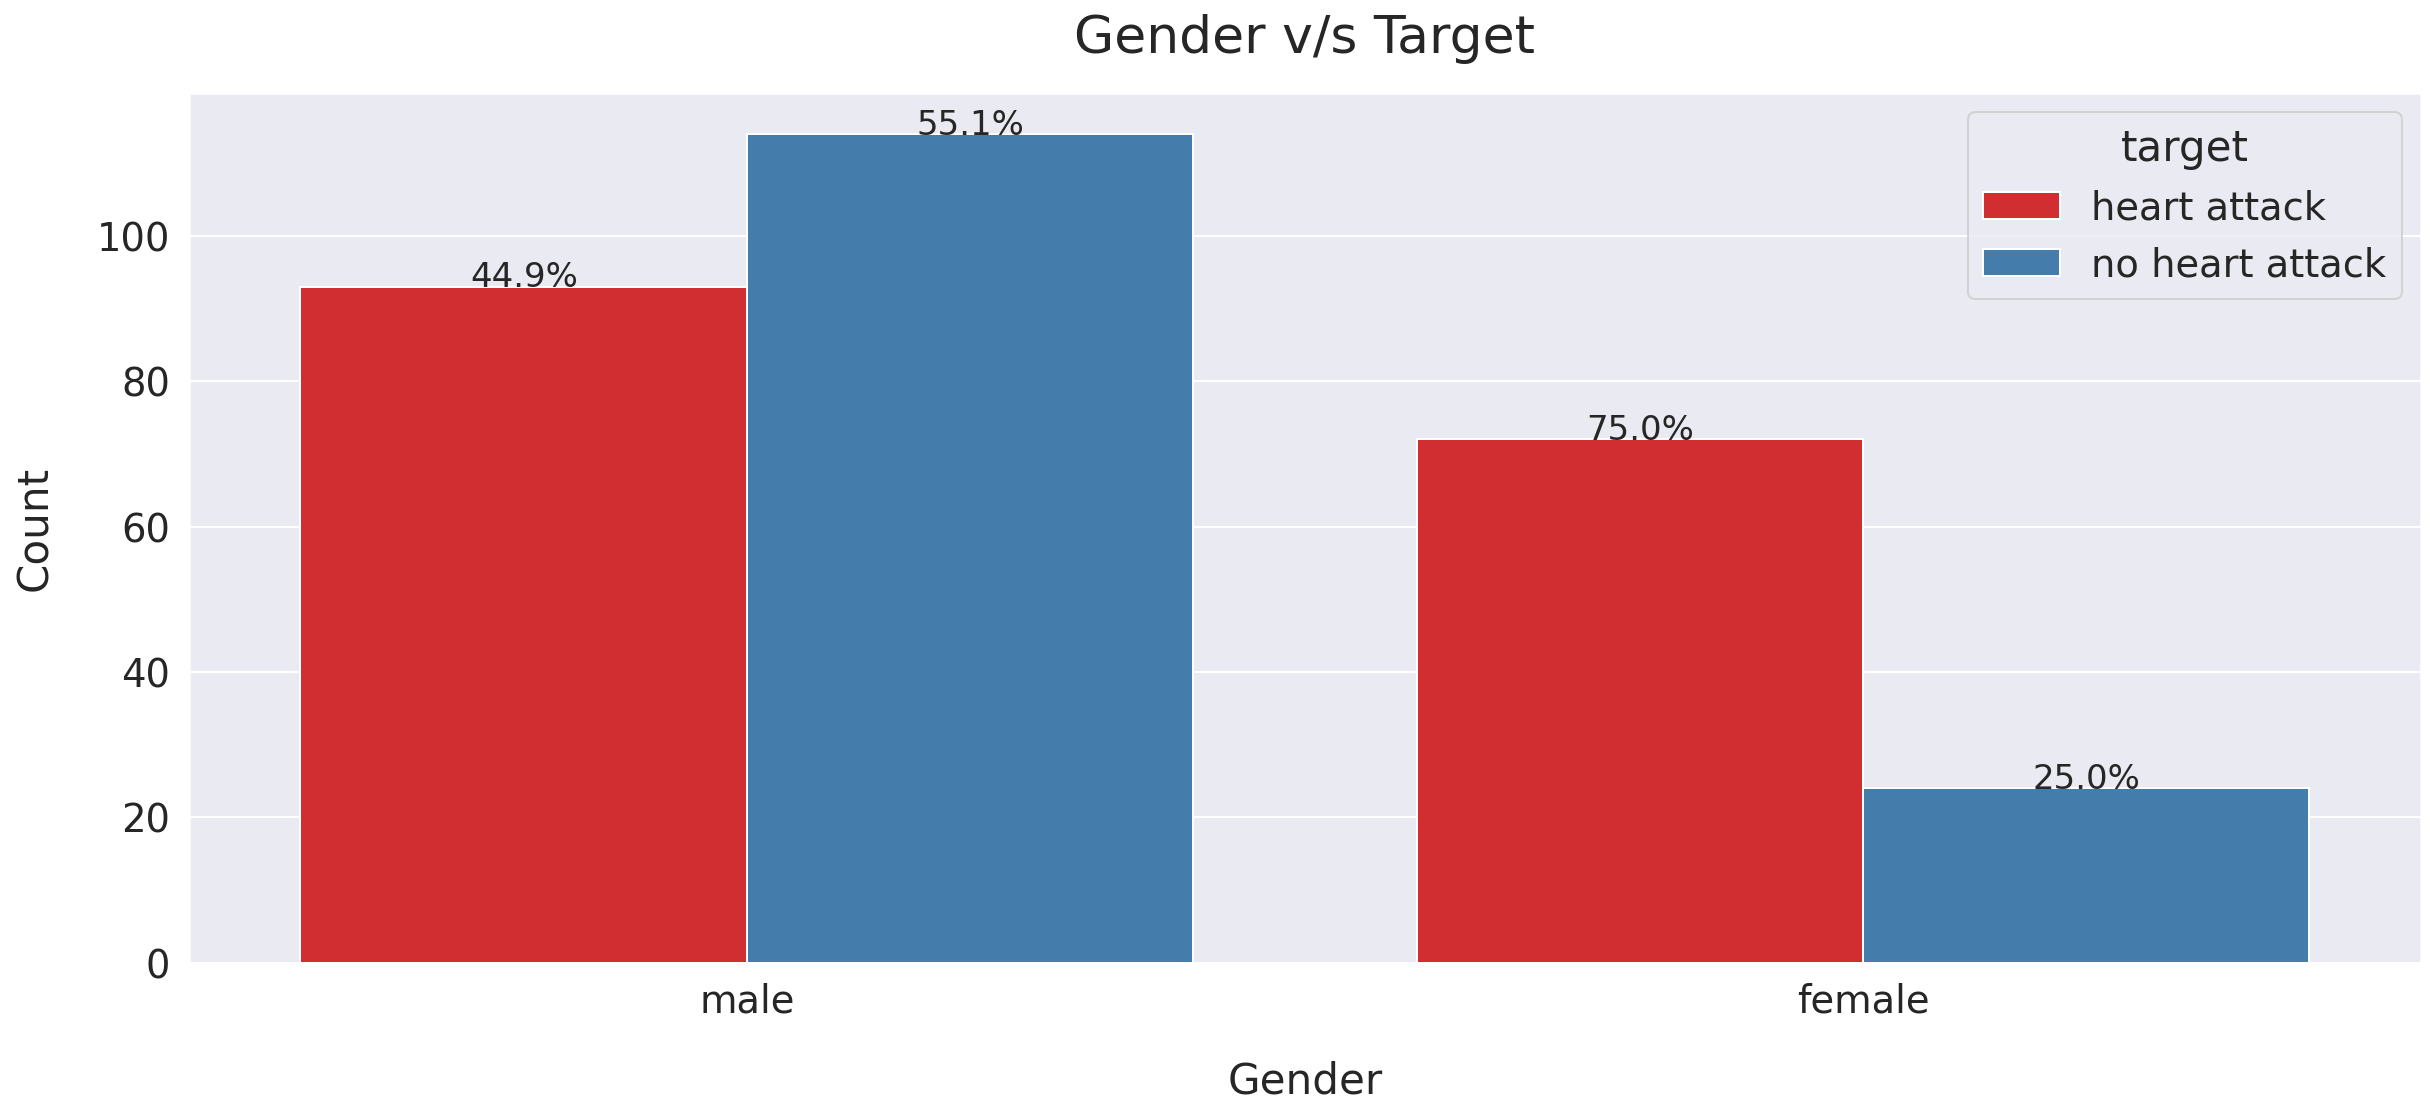

In [17]:
#Set color palette for the chart
g = sns.color_palette("Set1")

#Use a countplot to plot the chart
plt.rcParams["figure.figsize"] = (20,8)
g = sns.countplot(data= heart_data, x='sex',hue='target', color="salmon", palette=g, saturation=0.8, linewidth=1)
plt.title('Gender v/s Target', pad=20, fontsize = 26)
plt.xlabel("Gender", labelpad=20)
plt.ylabel("Count", labelpad=20)
annotate_percent(g, heart_data.sex, 2, 2)

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">It is obvious that there are more females than males as seen in this dataset. However, **males are seen to be more susceptible to a heart attack than females**, as it shows that almost half **(44.1%)** of the males have experienced a heart attack. Therefore medical screenings could be advised to be more targeted (not restricted) to that gender(male) in order to help pick cases more easily. It is also seen that with the fewer numbers of females in the dataset, more than half of them have had a heart attack.

<a id='3'></a>

# <div class="subsubsubsection_title">3. Does high cholesterol level determine heart attack?

<Figure size 4320x4320 with 0 Axes>

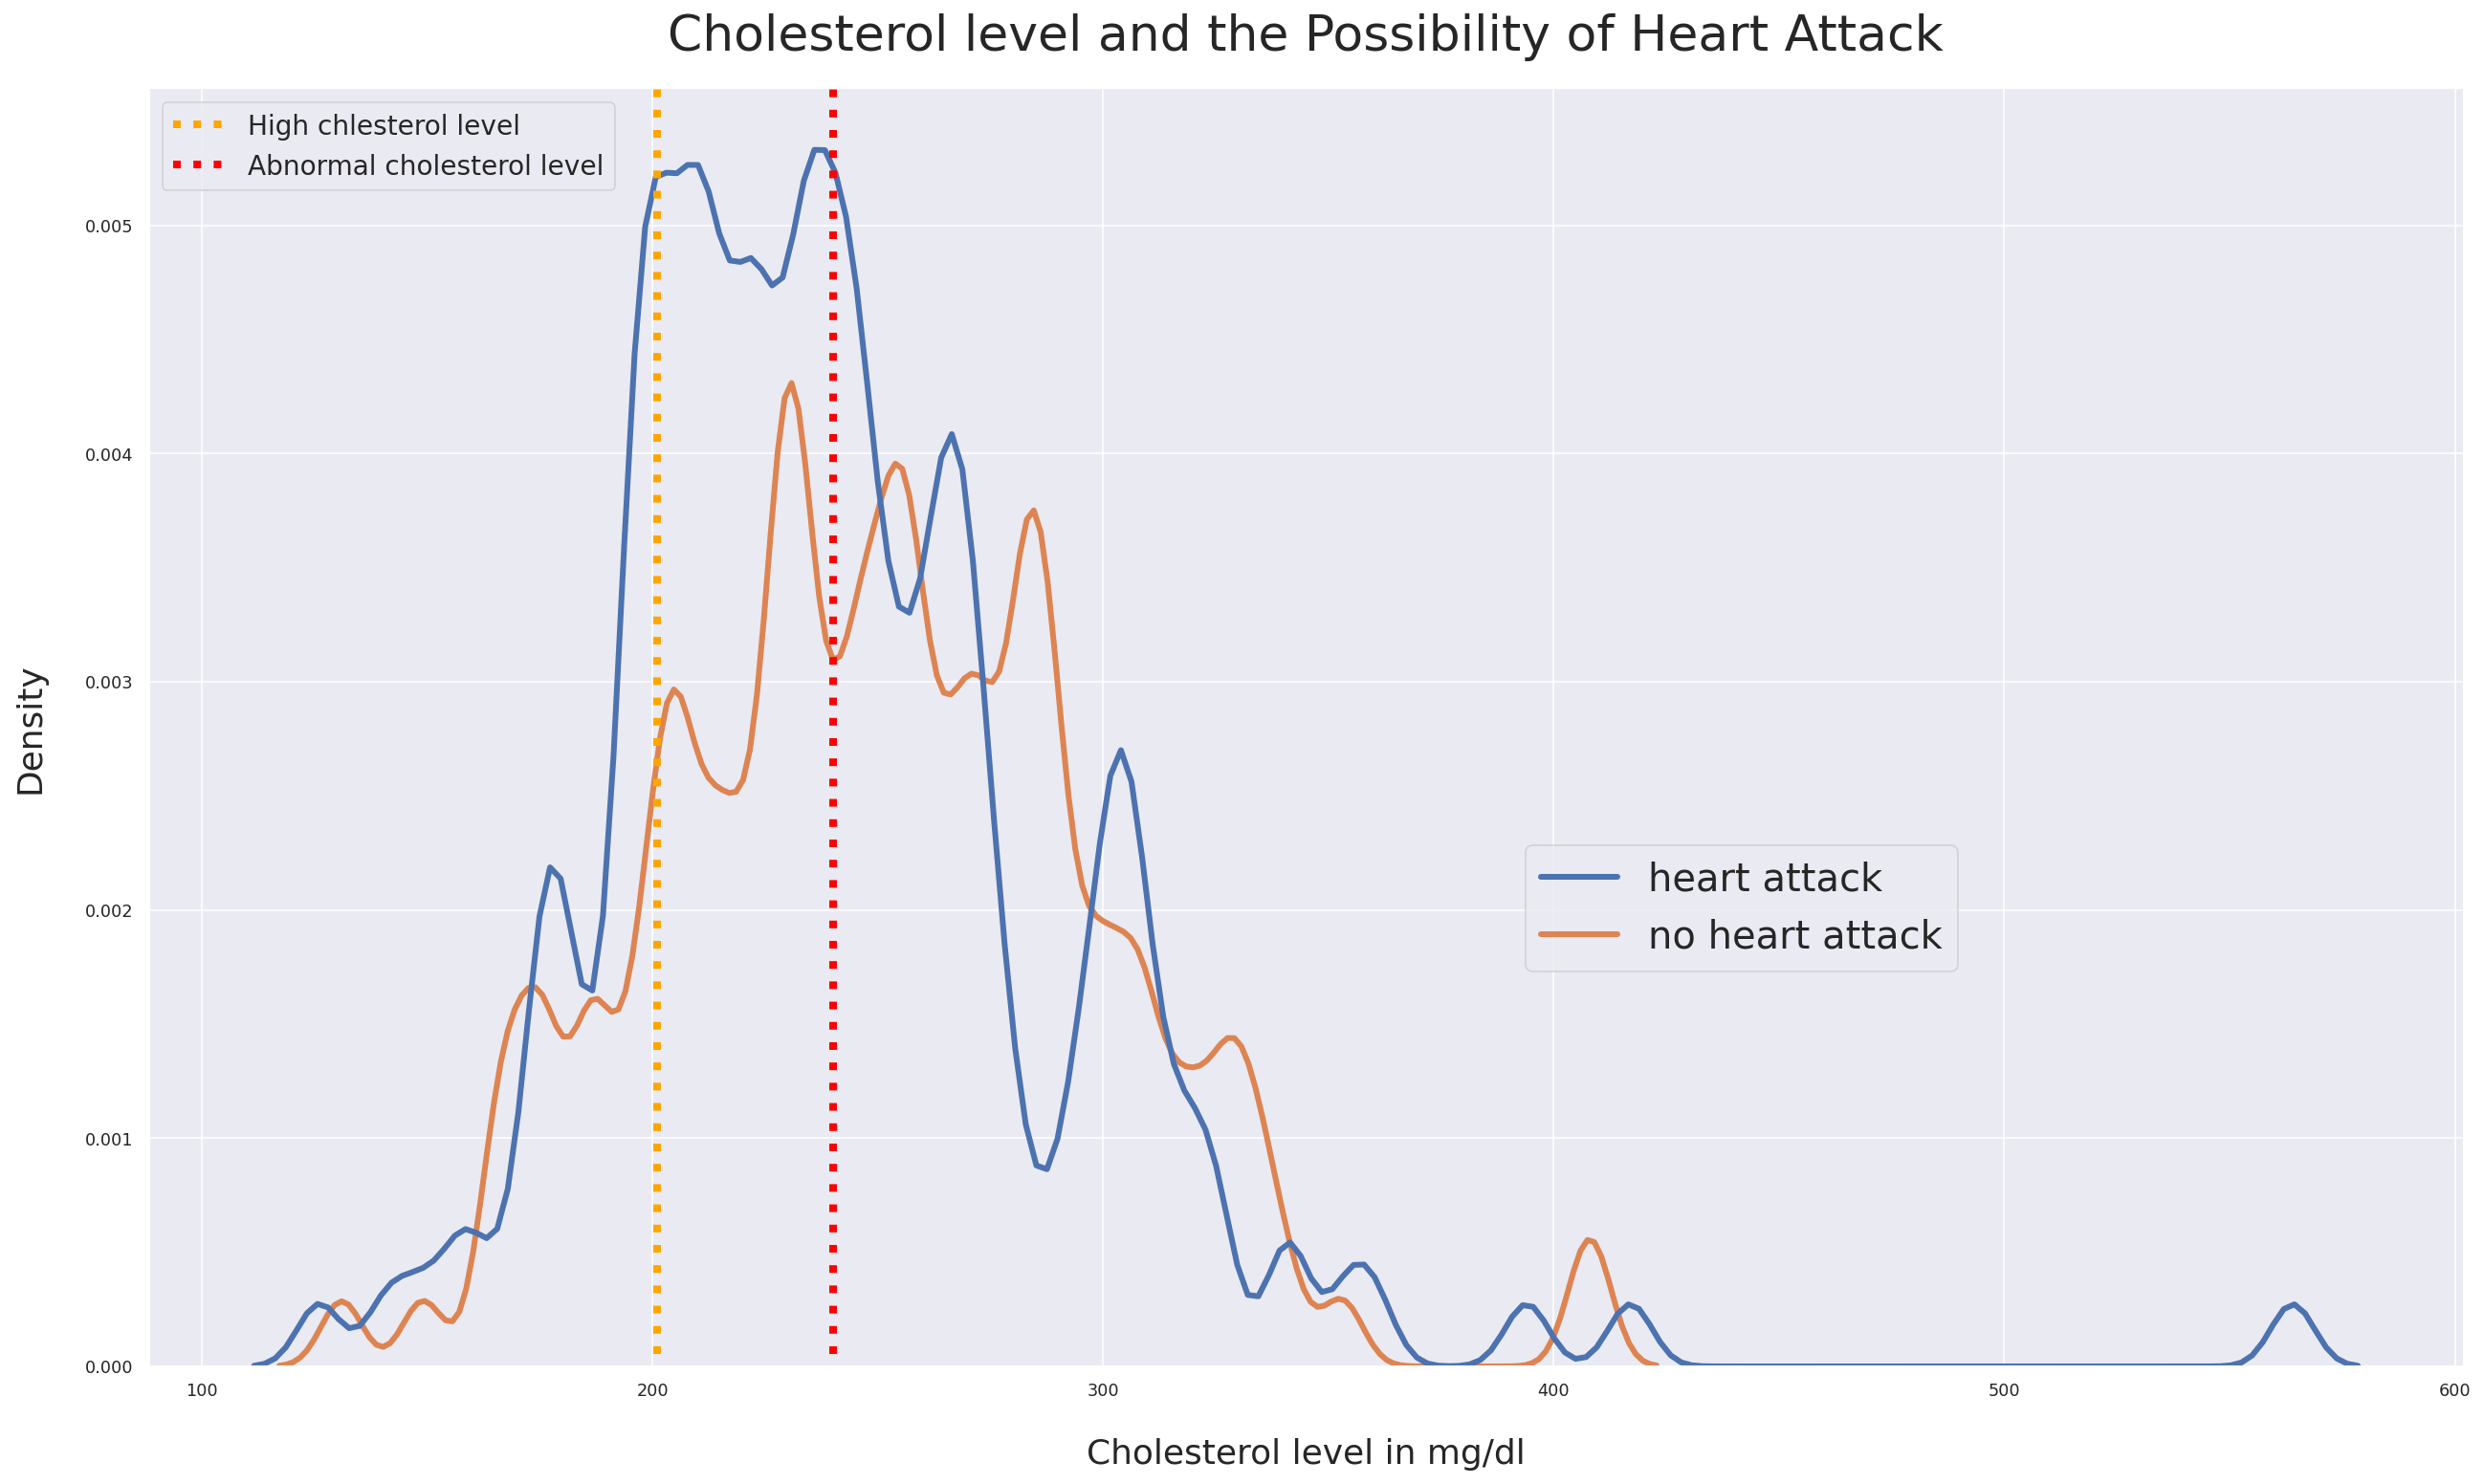

In [18]:
sns.set_theme(context='paper', style='darkgrid')
plt.figure(figsize =(60,60))
g = sns.displot(heart_data, x="chol", hue= "target", kind="kde", bw_adjust=.25, color = ['subject'], linewidth = 3,height=10, aspect=1.8, legend=True)

plt.title("Cholesterol level and the Possibility of Heart Attack", pad=20, fontsize = 26)
plt.xlabel("Cholesterol level in mg/dl", labelpad=20, fontsize = 18)
plt.ylabel("Density", labelpad=20, fontsize = 18)
sns.move_legend(g, "upper left", bbox_to_anchor=(.55, .45), title=None, frameon=True, fontsize=20)
plt.axvline(x=201, ymin=0.01, color='orange', linestyle='dotted', linewidth=4, label = 'High chlesterol level')
plt.axvline(x=240, ymin=0.01, color='red', linestyle='dotted', linewidth=4, label = 'Abnormal cholesterol level')
plt.legend(loc = 'upper left', fontsize=14)

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">From John Hopkins Medicine, it is concluded on the total cholesterol levels for adults as shown in the table below:

<html>
<style>
   
table, th, td {
  border:1px solid black;
}    
</style>
<body>

<table style="width:95%;font-size:16px">
  <tr>
    <th style="width:2%">S/N</th>
    <th style="width:10%">Cholesterol level</th>
    <th style="width:40%">Description</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Less than 200 mg/dl</td>
    <td>Normal</td>
    <td>-</td>
  </tr>
  <tr>
    <td>2</td>
    <td>200 - 239 mg/dl</td>
    <td>Highr</td>
  </tr>
  <tr>
    <td>3</td>
    <td>At or above 240 mg/dl</td>
    <td>Abnormal</td>
   </tr>
</table>

</body>
</html>

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">From the above plot, people with cholesterol levels above 200 mg/dl are more prone to experiencing a heart attack. At extreme cholesterol levels, individuals do not have a heart attack.

<a id='4'></a>

# <div class="subsubsubsection_title">4. Are older people with high cholesterol levels more susceptible to heart attacks?

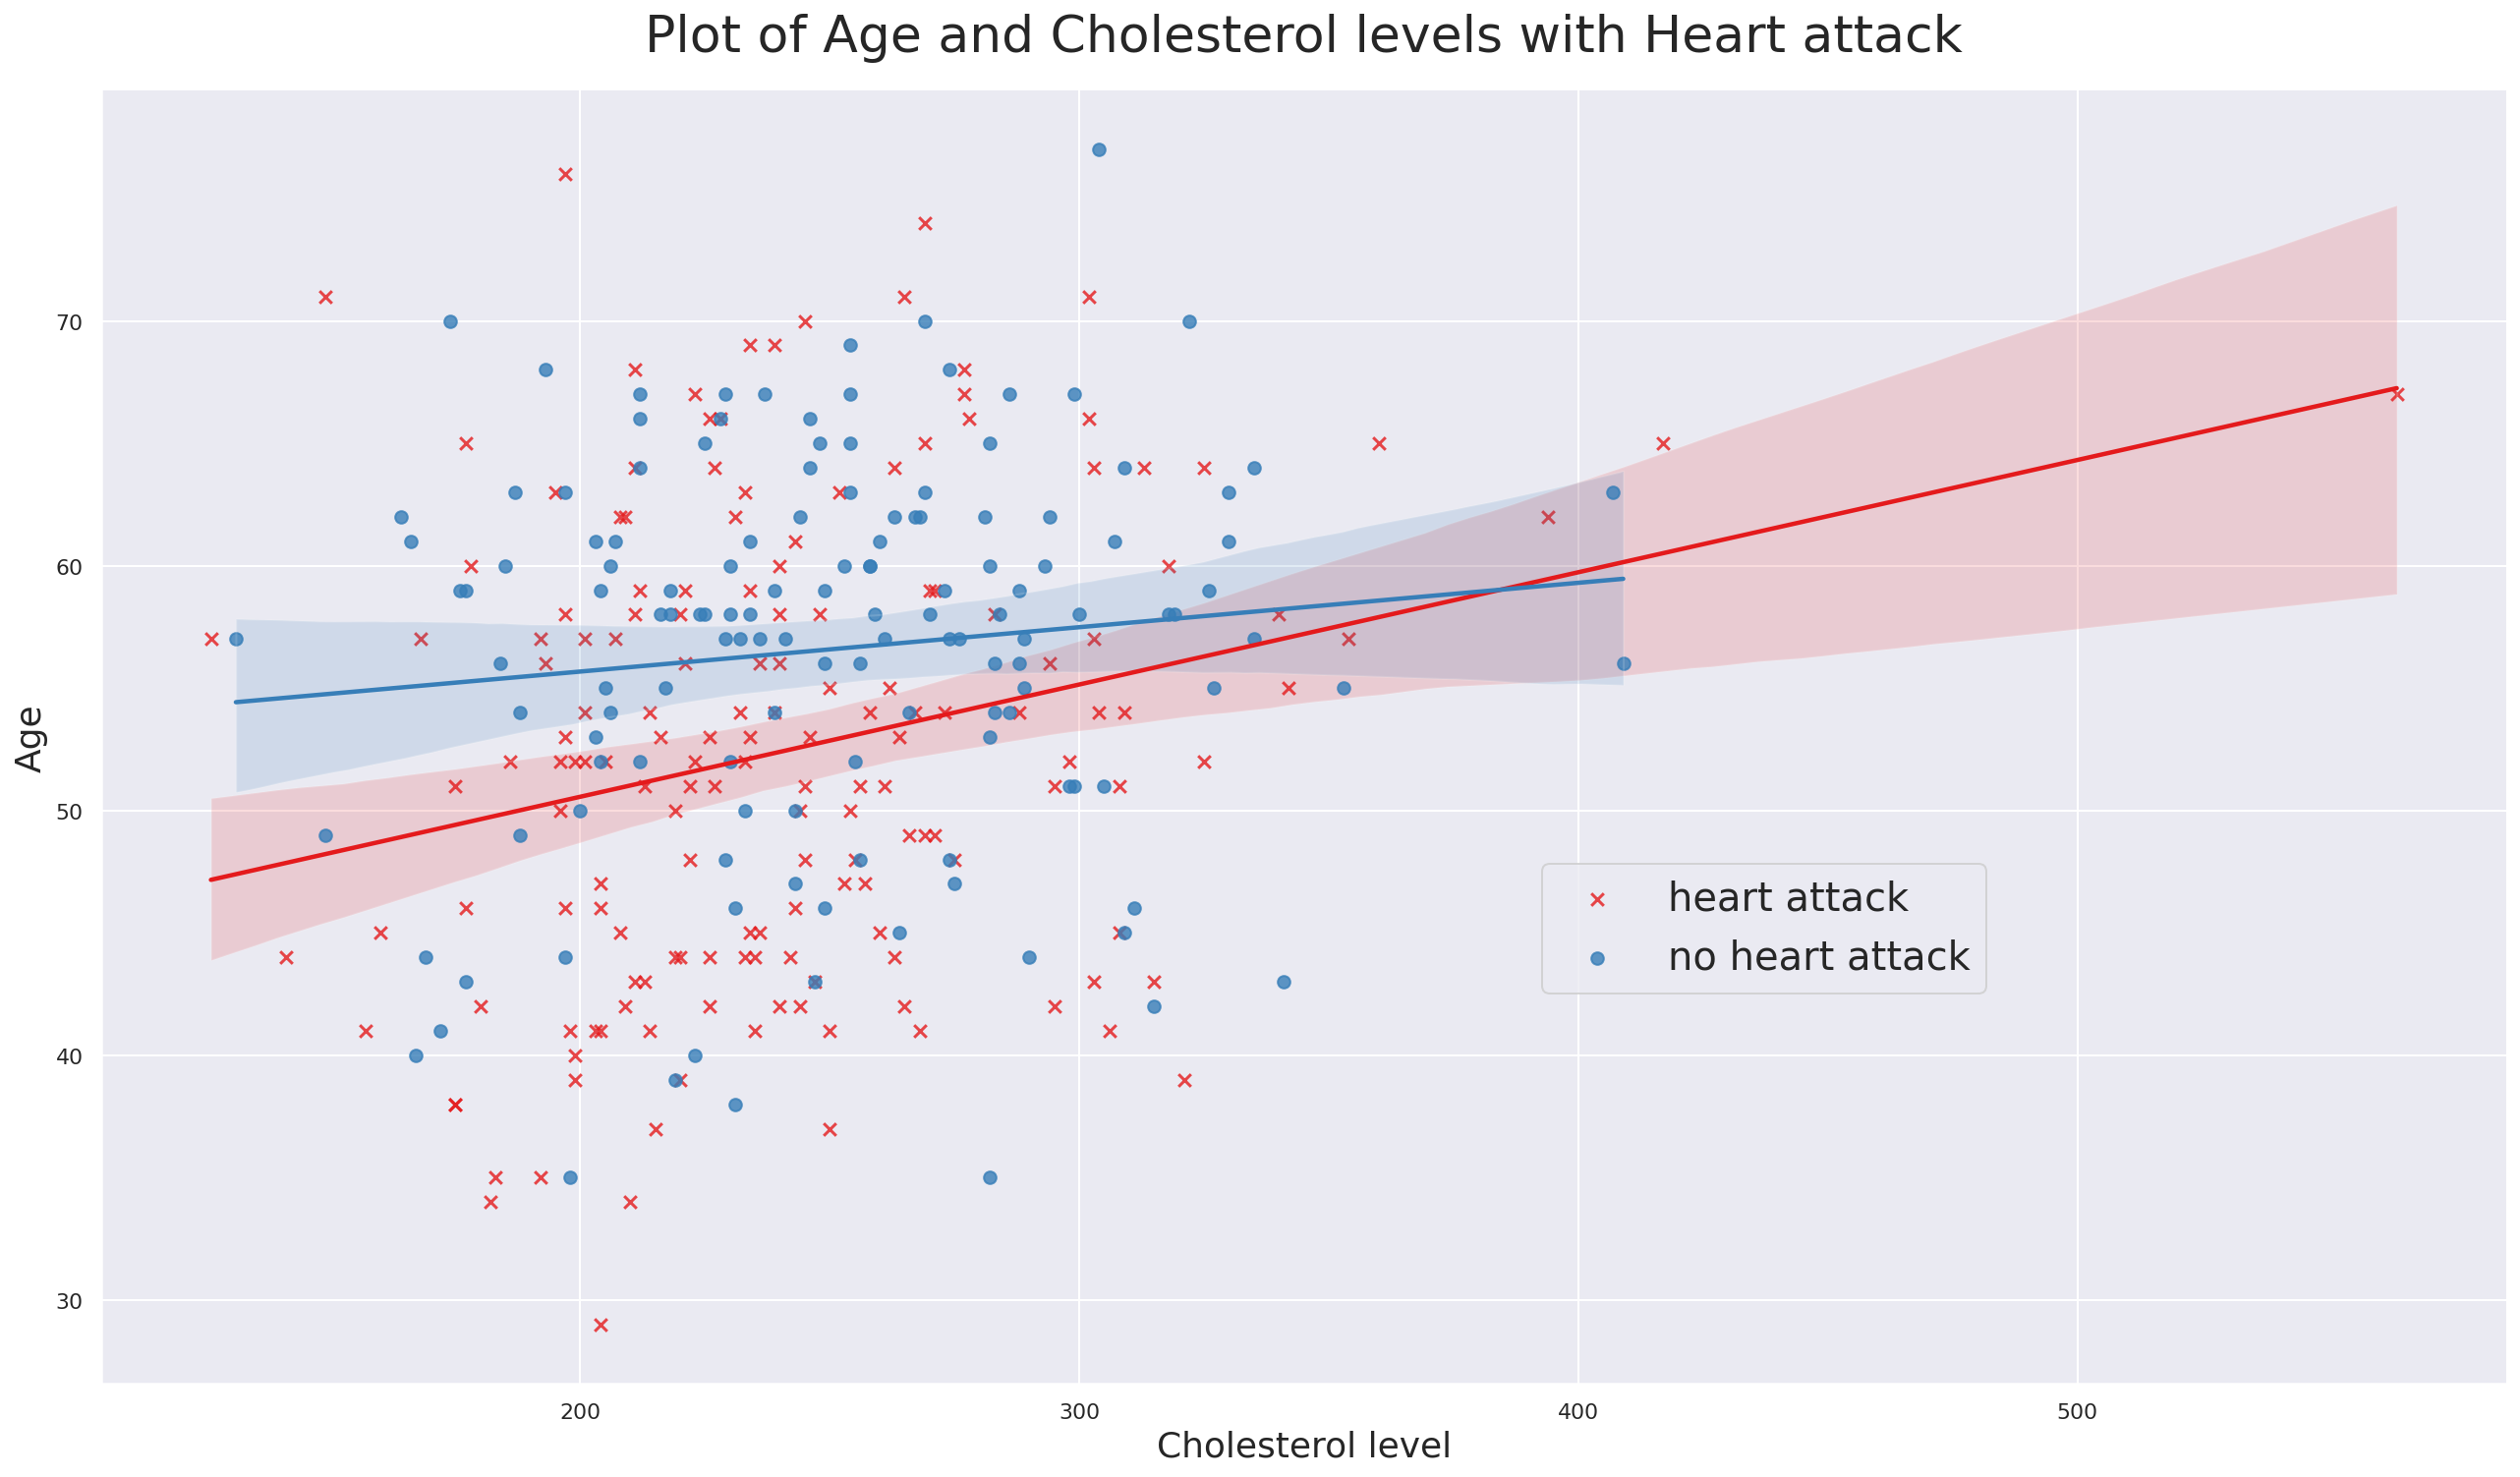

In [19]:
sns.set_theme(style="darkgrid")

# Plot cholesterol level as a function of age across target
g = sns.lmplot(
    data=heart_data,
    x="chol", y="age", hue="target",palette="Set1", markers=["x", "o"], scatter_kws ={'s':40}, height=10, aspect=1.8)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Cholesterol level", "Age", fontsize = 18)
plt.title("Plot of Age and Cholesterol levels with Heart attack", pad=20, fontsize = 26)
sns.move_legend(g, "upper left", bbox_to_anchor=(.55, .45), title=None, frameon=True, fontsize=20)

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">We see a **strong positive relationship** between heart attacks as the individual gets older and the cholesterol levels become higher.
It may account that when people get older, their physical condition may undergo some decline along with the heart rate, which may cause a heart attack. This is not to neglect the fact that the youngest individual as seen in the plot experienced a heart attack, which indicates that there are several causalities still.

<a id='5'></a>

# <div class="subsubsubsection_title">5. Is heart attack more common with the young below 40 or the older ones above 40?

In [20]:
print("This shows the number of individiduals experiencing heart attacks by their ages")
heart_attack_filter = heart_data.target=='heart attack'
heart_attack_df = pd.DataFrame(heart_data.loc[heart_attack_filter].age.value_counts().sort_values())
display(heart_attack_df.head())
display(heart_attack_df.tail())

This shows the number of individiduals experiencing heart attacks by their ages


,age
70,1
40,1
29,1
76,1
74,1


,age
44,8
52,9
41,9
51,9
54,10


Text(0, 0.5, 'Count')

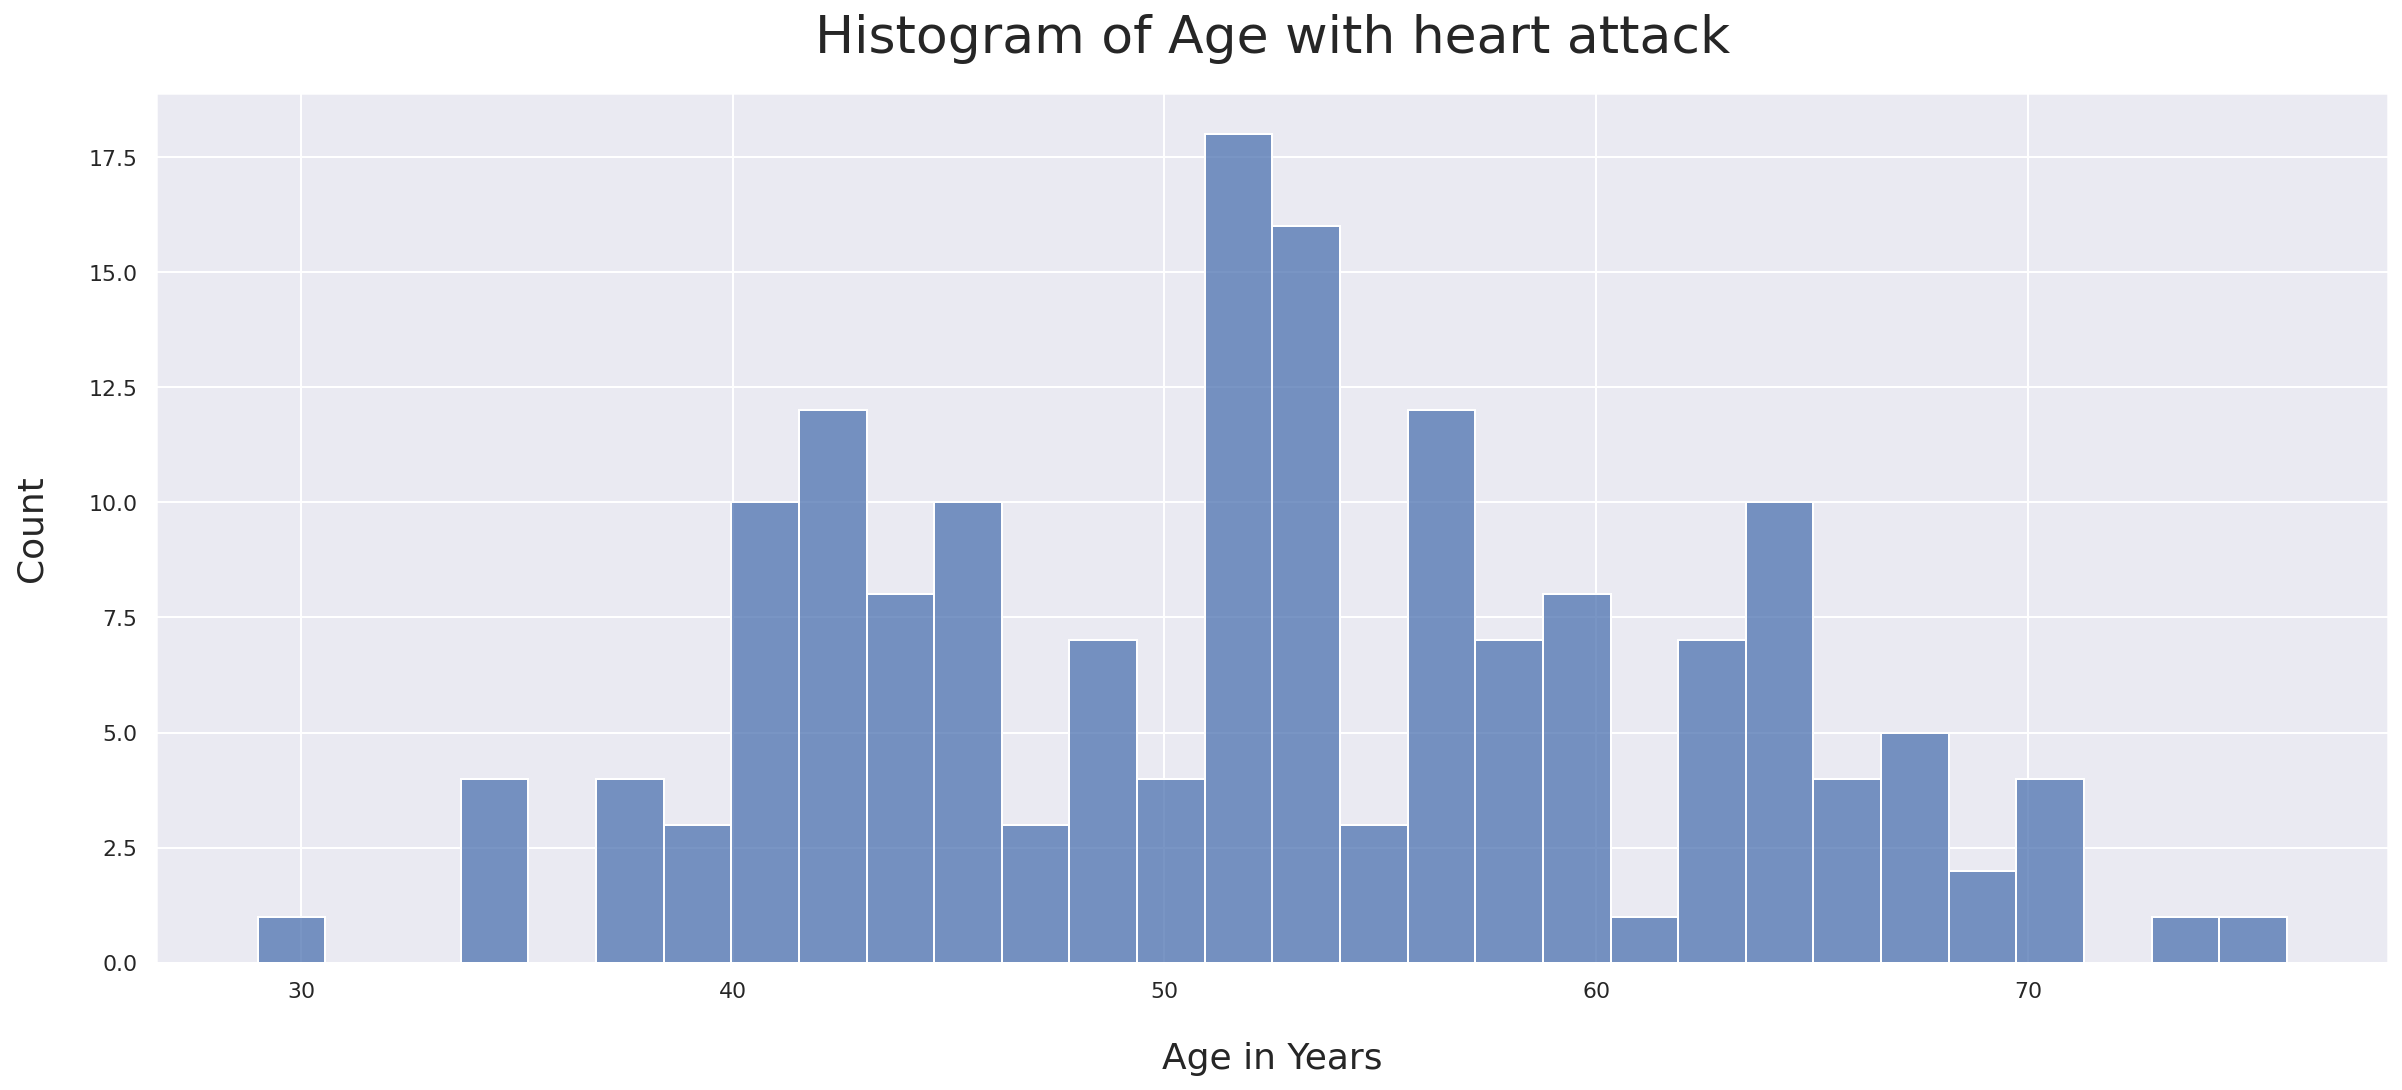

In [21]:
plt.rcParams["figure.figsize"] = (20,8)
sns.histplot(heart_data.age[heart_data["target"]=='heart attack'], bins=30)
plt.title("Histogram of Age with heart attack", pad=20, fontsize = 26)
plt.xlabel("Age in Years", labelpad=20, fontsize = 18)
plt.ylabel("Count", labelpad=20, fontsize = 18)

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">We see that *only three(3)* individuals who are below 40 years of age have experienced a heart attack. This shows that **older individuals are prone** to having a heart attack than the younger ones(below 40 years), although, the youngest individual in this survey at **29 years of age** has experienced a heart attack. The histogram follows an almost bell shape, with most values clustering around a central region (**between 50 and 60 years of age**) and tapering off as they go further away from the center.

<a id='6'></a>

# <div class="subsubsubsection_title">6. Does chest pain always lead to a heart attack later in future?

In [22]:
def annotate_percent(ax, column, no_of_col_cat, no_hue_cat):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    
    for i in range(no_of_col_cat):
        total = column.value_counts().values[i]        
        for j in range(no_hue_cat):
            percentage = '{:.1f}%'.format(100 * a[(j*no_of_col_cat + i)]/total)
            x = patch[(j*no_of_col_cat + i)].get_x() + patch[(j*no_of_col_cat + i)].get_width() / 1.8 - 0.07
            y = patch[(j*no_of_col_cat + i)].get_y() + patch[(j*no_of_col_cat + i)].get_height() 
            
            print(x, y)
            ax.annotate(percentage, (x, y), size = 17)

-0.2477777777777778 16
1.7522222222222223 41
0.15222222222222223 7
2.1522222222222225 9
0.7522222222222223 69
2.752222222222222 39
1.152222222222222 18
3.1522222222222225 104


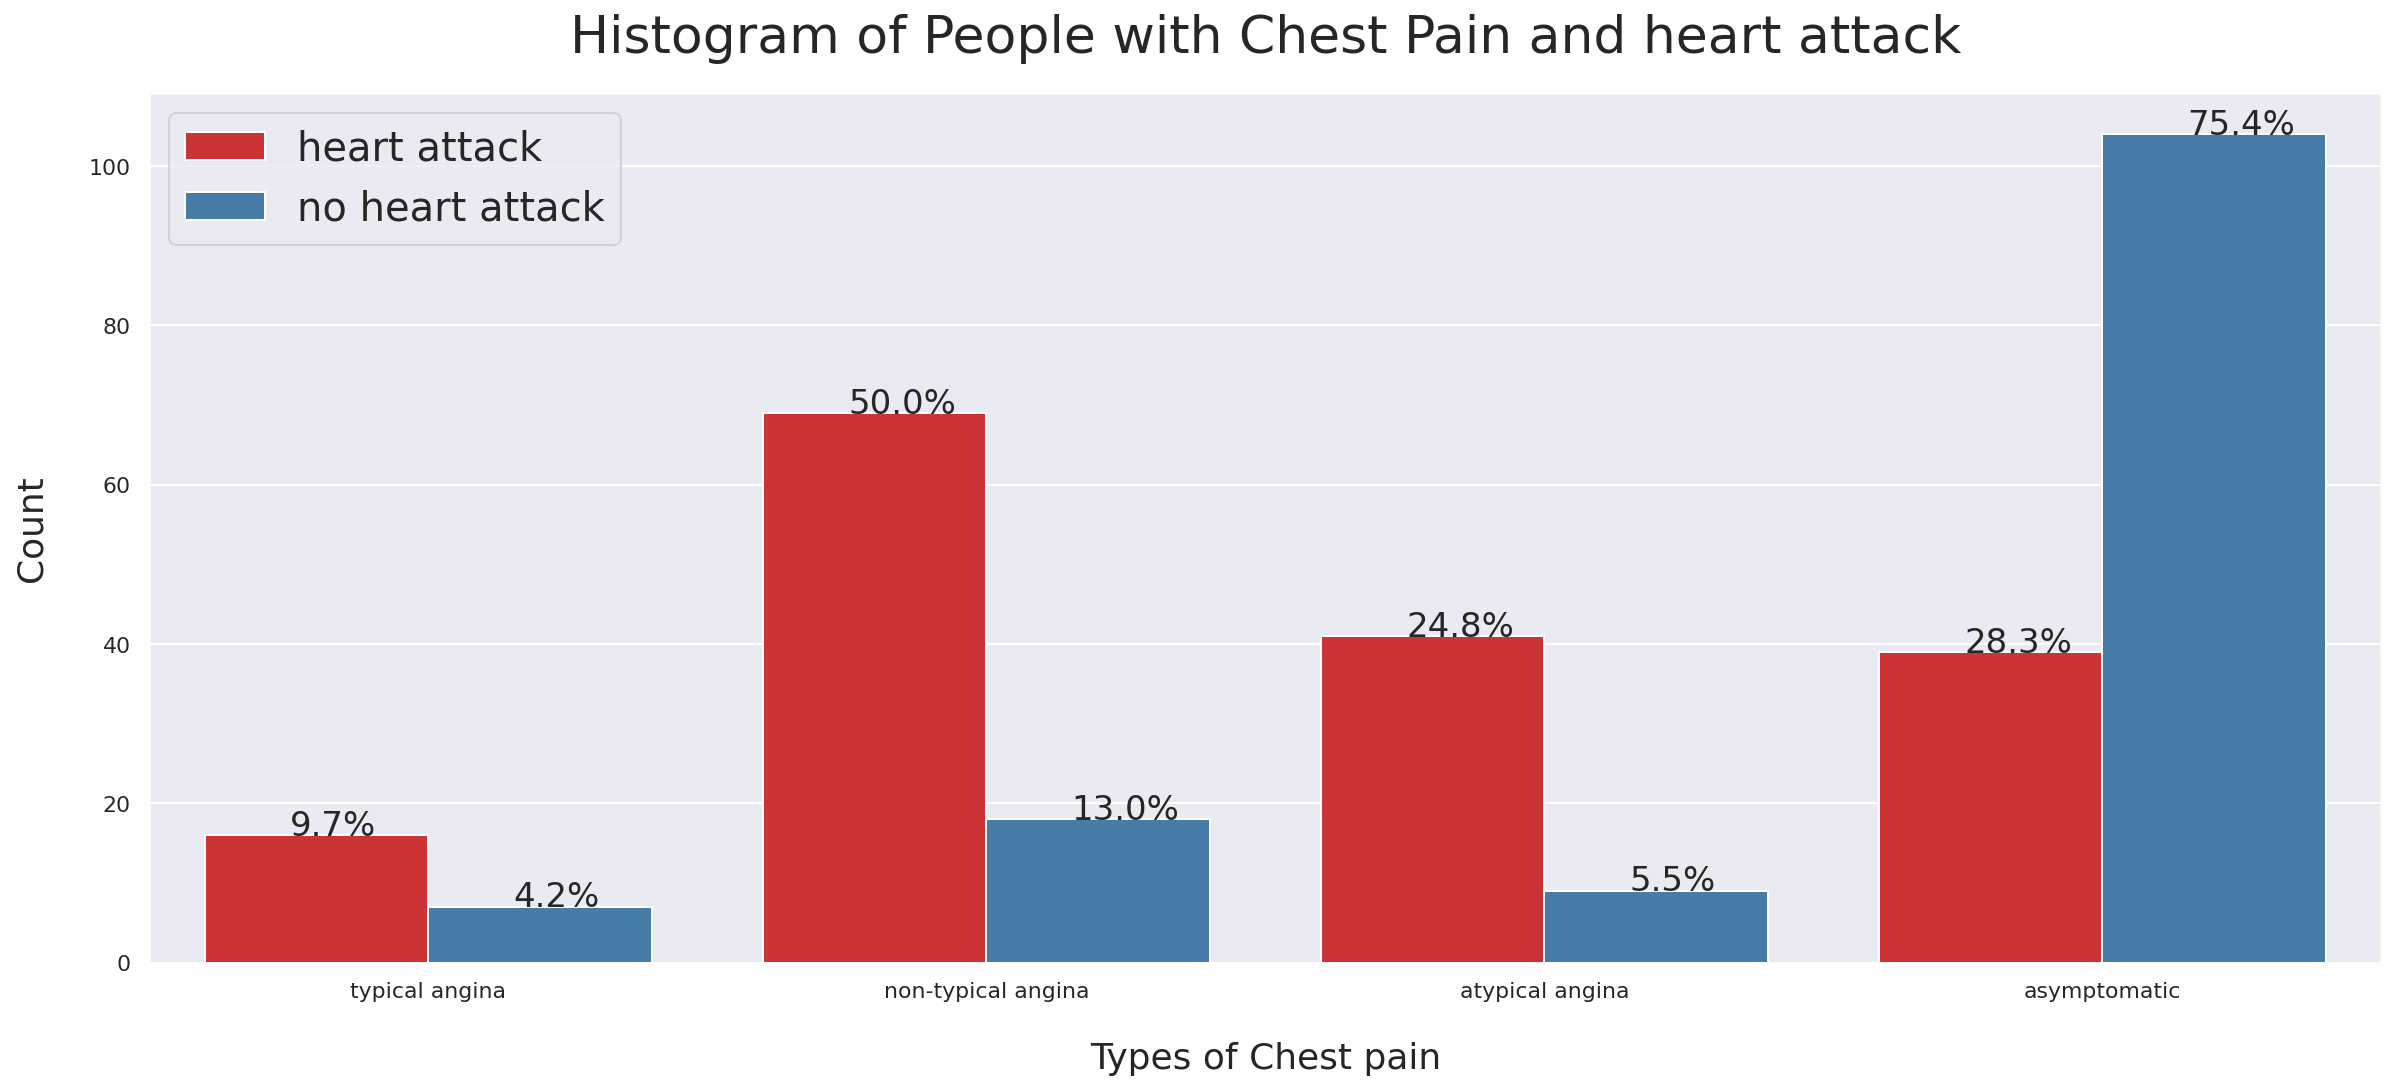

In [23]:
plt.figure(figsize=(20,8)),
ax = sns.countplot(x = 'cp', data = heart_data, hue ='target', order=['typical angina', 'non-typical angina', 'atypical angina', 'asymptomatic'], palette='Set1')

#for p in ax.patches:
    #ax.annotate('{:}'.format(p.get_height()), (p.get_x()+.18, p.get_height()+1))
    
plt.title("Histogram of People with Chest Pain and heart attack", pad=20, fontsize = 26)
plt.xlabel("Types of Chest pain", labelpad=20, fontsize = 18)
plt.ylabel("Count", labelpad=20, fontsize = 18)
plt.legend(fontsize=20)
annotate_percent(ax, heart_data.target, 2, 4)

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">Chest pain which is also known as **angina pectoris** is often characterized with pressure, tightness, or heaviness located centrally in the chest, and sometimes as strangling, constricting, or burning. The pain often radiates elsewhere in the upper body, mainly arms, jaw and/or back. Chest pains are categorised into **four types** - **Typical angina, Non-typical angina, Atypical angina and Asyptomatic.** A typical angina can be described with the following criteria: (1) Substernal chest pain or discomfort that is (2) Provoked by exertion or emotional stress and (3) relieved by rest or nitroglycerine (or both). Non-typical angina occurs when it meets at least one criteria of the typical angina. Atypical angina chest pain applies when 2 out of 3 criteria of typical angina are present. Asymptomatic shows no symptoms.

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;"> The chart shows that most individuals who have experienced heart attacks have suffered from **non-typical angina**. There is a significant number of individuals with no symptoms (asymptomatic) without heart attacks. However, up to **39 individuals still experienced heart attacks**. Individuals with typical angina had the least experiences of heart attacks. There could be other diseases or conditions that could lead to heart attacks. 

<a id='7'></a>

# <div class="subsubsubsection_title">7. What other attributes could cause a heart attack?

In [24]:
# Install dython - a set of Data analysis tools in Python 3.x
!pip install dython

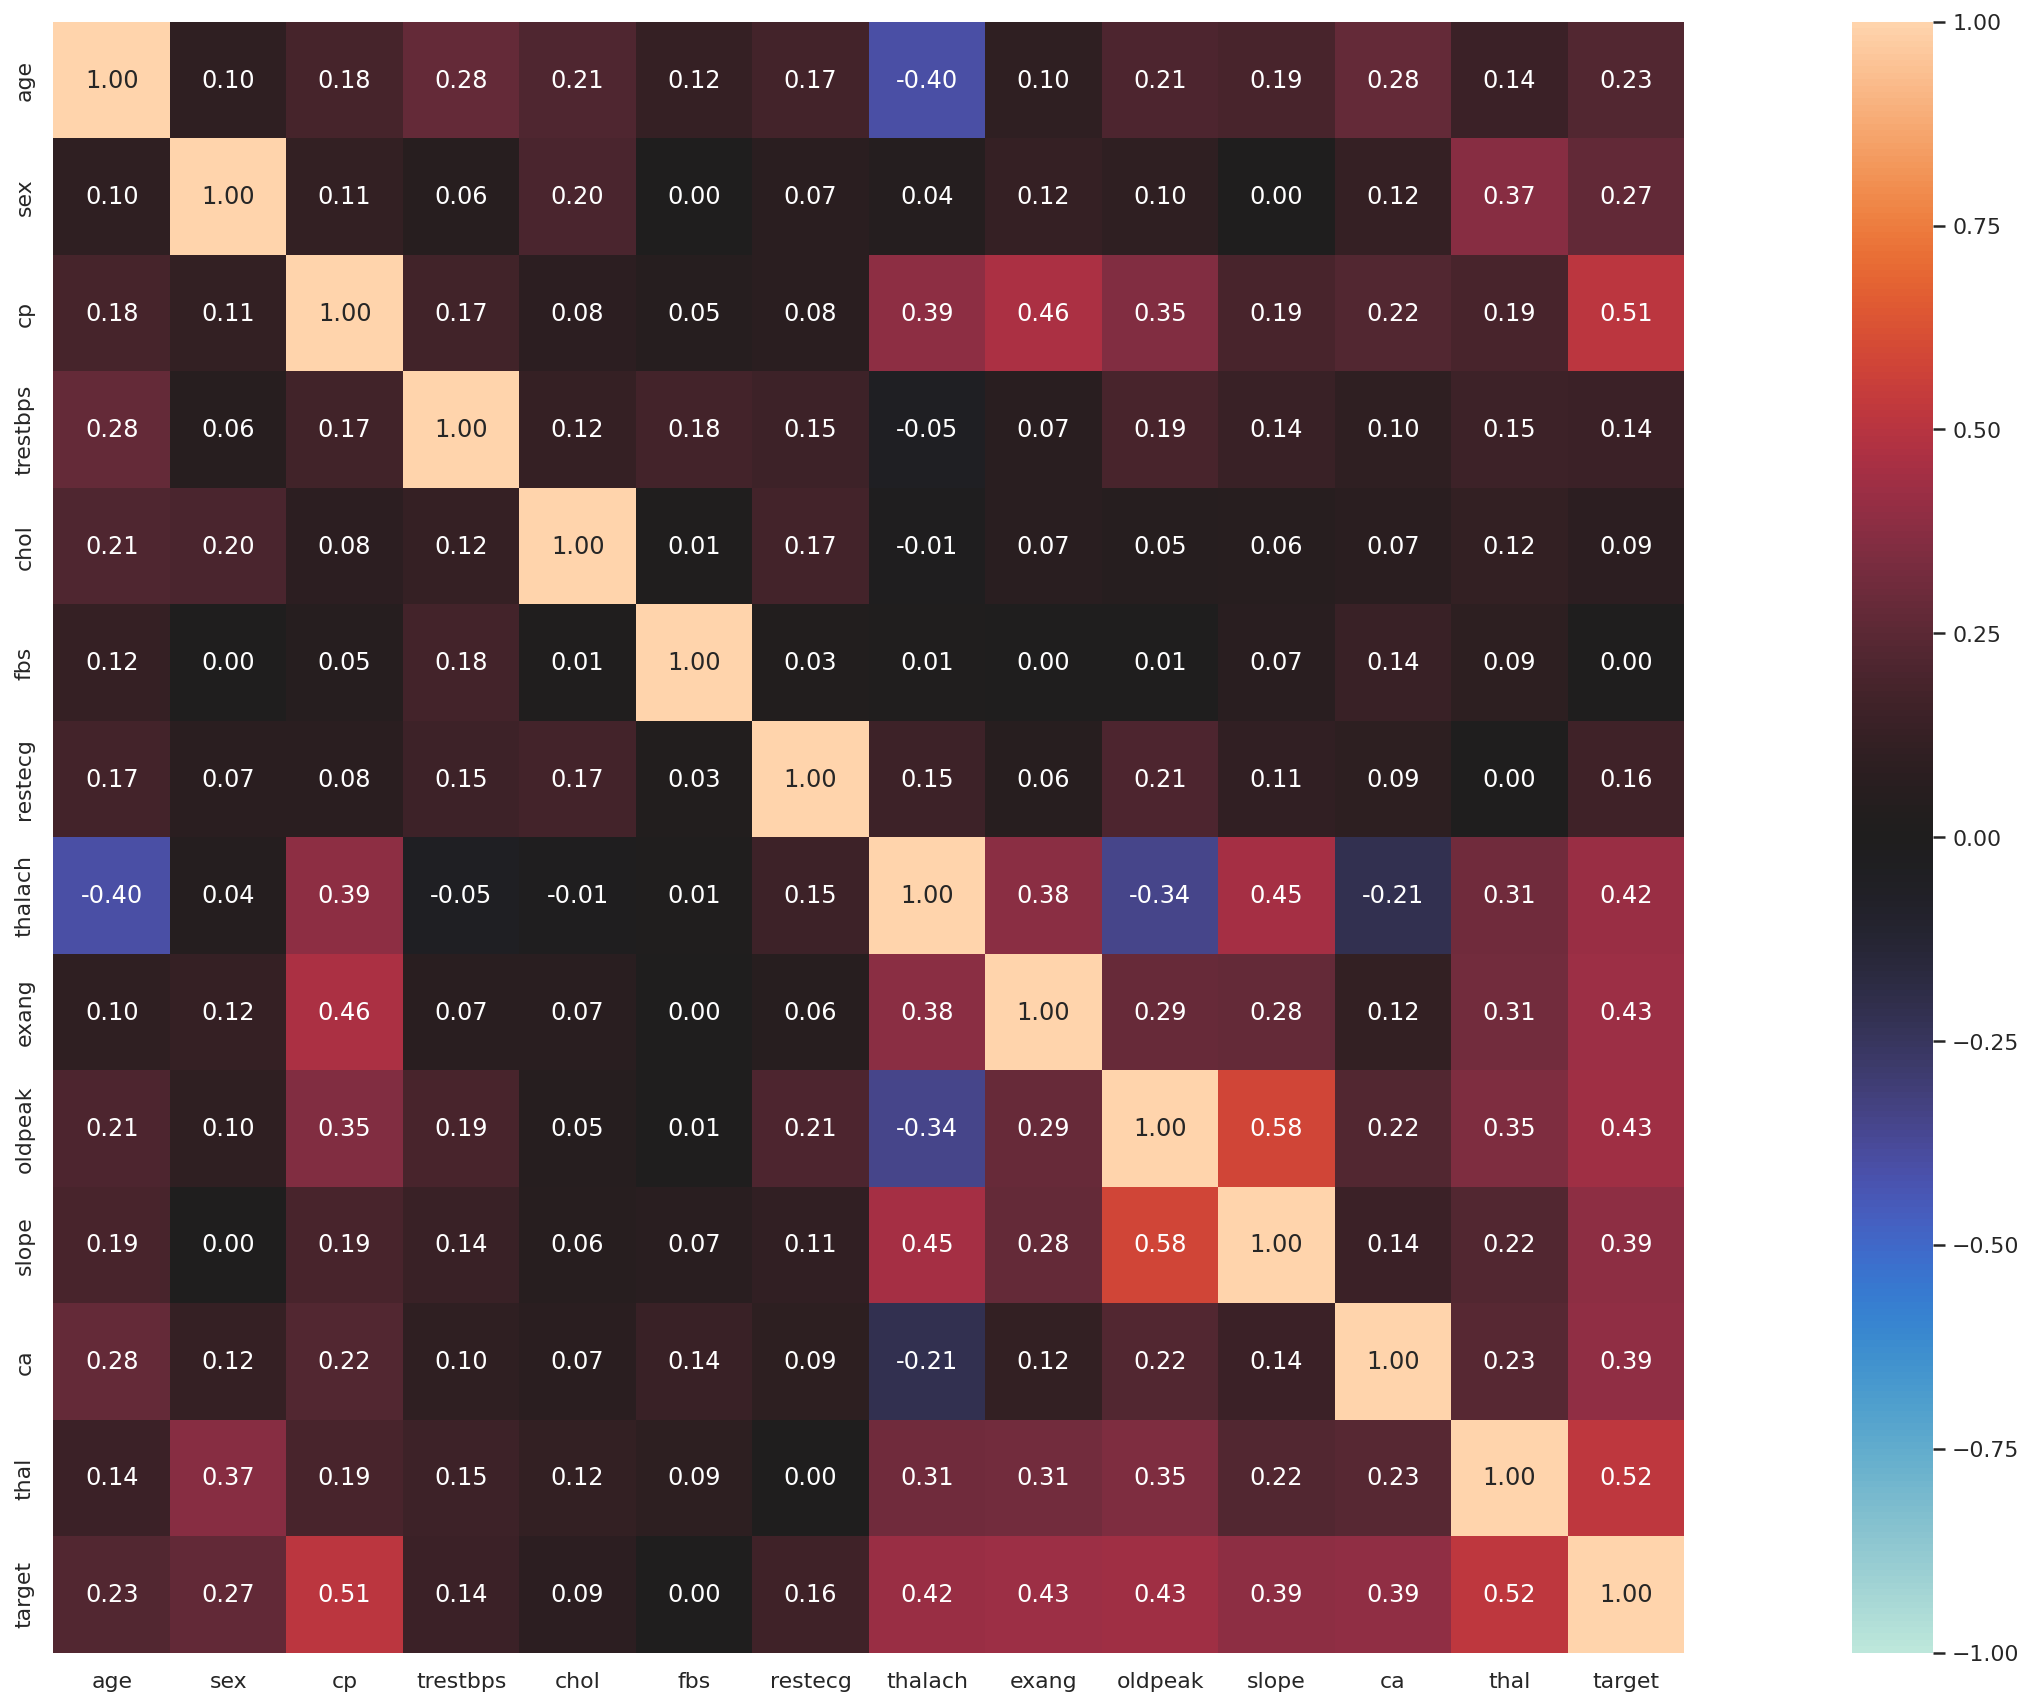

Text(0.5, 0.98, 'Correlation Map of Categorical and Numerical Variables')

<Figure size 1440x576 with 0 Axes>

In [25]:
# Calculate the correlation/strength-of-association of features in data-set with both categorical and continuous features
from dython import nominal
nominal.associations(heart_data,figsize=(30,15),mark_columns=False);
plt.suptitle('Correlation Map of Categorical and Numerical Variables', fontweight='heavy', y=0.98, ha='center', va='top', fontsize='30')

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">**"dython"** a Python data analysis package was installed to visualize correlations between numerical and categorical variables -There is a **strong negative correlation** between the ages of the individuals in this dataset and their thalach (maximum heart rate achieved). There is also a slightly strong negative correlation between the oldpeak (ST depression induced by exercise relative to rest) and the thalach of individuals. There are very **strong positive correlations of the target** with thal and cp, also with slope and oldpeak.

<a id='7a'></a>

# <div class="subsubsubsection_title">7a. Thalessemia and Target

In [26]:
def annotate_percent(ax, column, no_of_col_cat, no_hue_cat):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    
    for i in range(no_of_col_cat):
        total = column.value_counts().values[i]        
        for j in range(no_hue_cat):
            percentage = '{:.1f}%'.format(100 * a[(j*no_of_col_cat + i)]/total)
            x = patch[(j*no_of_col_cat + i)].get_x() + patch[(j*no_of_col_cat + i)].get_width() / 1.8 - 0.07
            y = patch[(j*no_of_col_cat + i)].get_y() + patch[(j*no_of_col_cat + i)].get_height() 
            
            print(x, y)
            ax.annotate(percentage, (x, y), size = 17)

-0.3588888888888889 6
-0.1588888888888889 130
0.04111111111111114 28
0.2411111111111111 1
0.6411111111111112 12
0.8411111111111111 36
1.041111111111111 89
1.2411111111111113 1


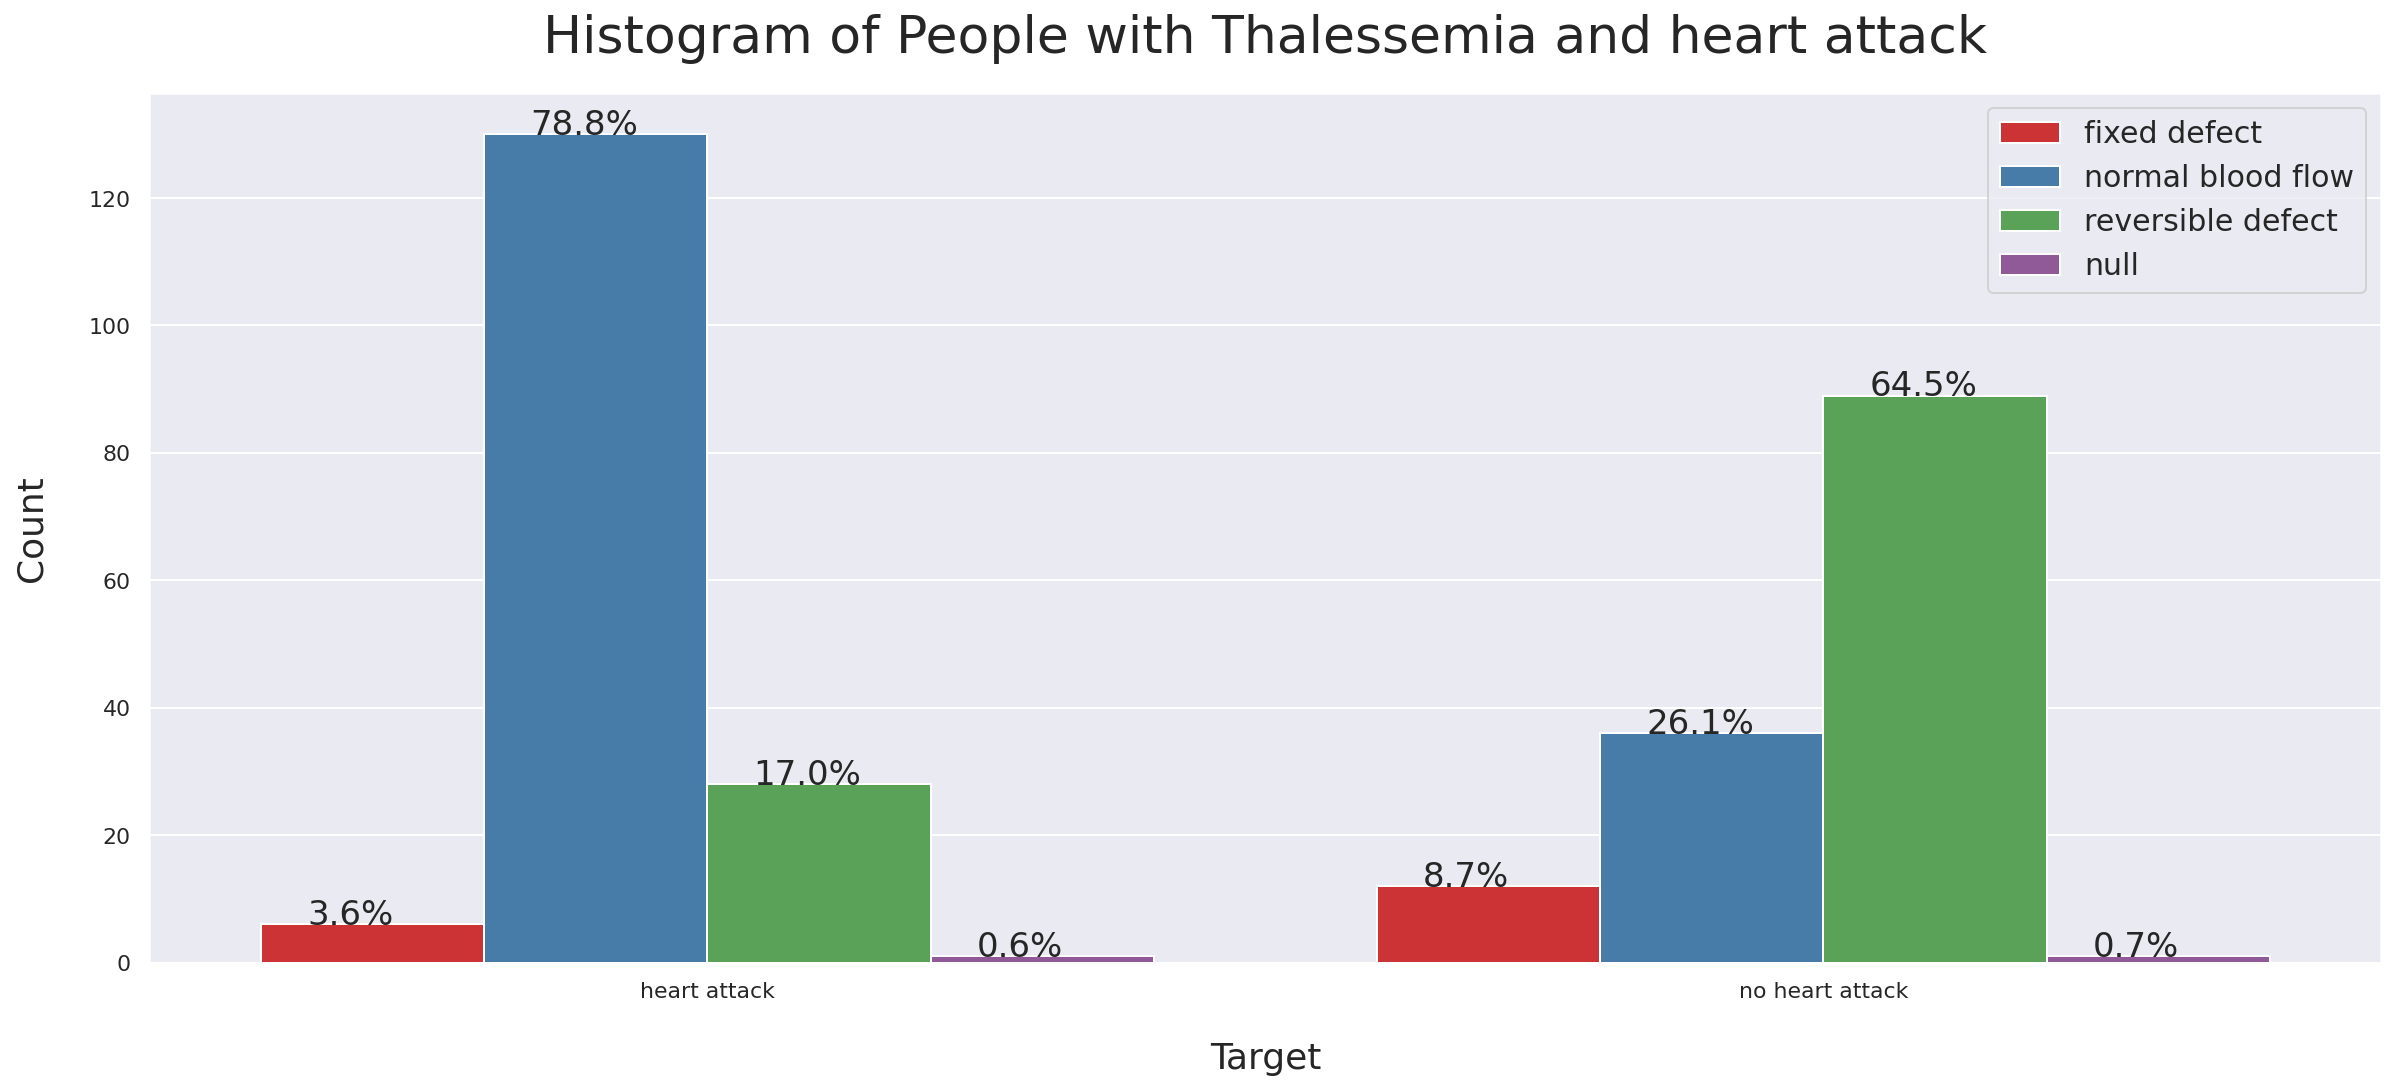

In [27]:
plt.figure(figsize=(20,8)),
ax = sns.countplot(x = 'target', data = heart_data, hue ='thal', order=['heart attack', 'no heart attack'], palette='Set1')

#for p in ax.patches:
    #ax.annotate('{:}'.format(p.get_height()), (p.get_x()+.10, p.get_height()+1))
    
plt.title("Histogram of People with Thalessemia and heart attack", pad=20, fontsize = 26)
plt.xlabel("Target", labelpad=20, fontsize = 18)
plt.ylabel("Count", labelpad=20, fontsize = 18)
plt.legend(fontsize=15)
annotate_percent(ax, heart_data.target, 2, 4)

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">[Thalassaemia](https://www.nhs.uk/conditions/thalassaemia/#:~:text=Thalassaemia%20is%20the%20name%20for,carry%20oxygen%20around%20the%20body) is caused by faulty genes that affect the production of haemoglobin. It is usually associated with severe tiredness, weakness, shortness of breath, pounding, fluttering or irregular heartbeats (palpitations). The chart shows that most people with normal blood flow (**at 78.8%**) have heart attacks, followed by individuals with reversible defect thalassemia. Other factors can cause a heart attack including lifestyle or diet.


<a id='7b'></a>

# <div class="subsubsubsection_title">7b. Slope and old peak

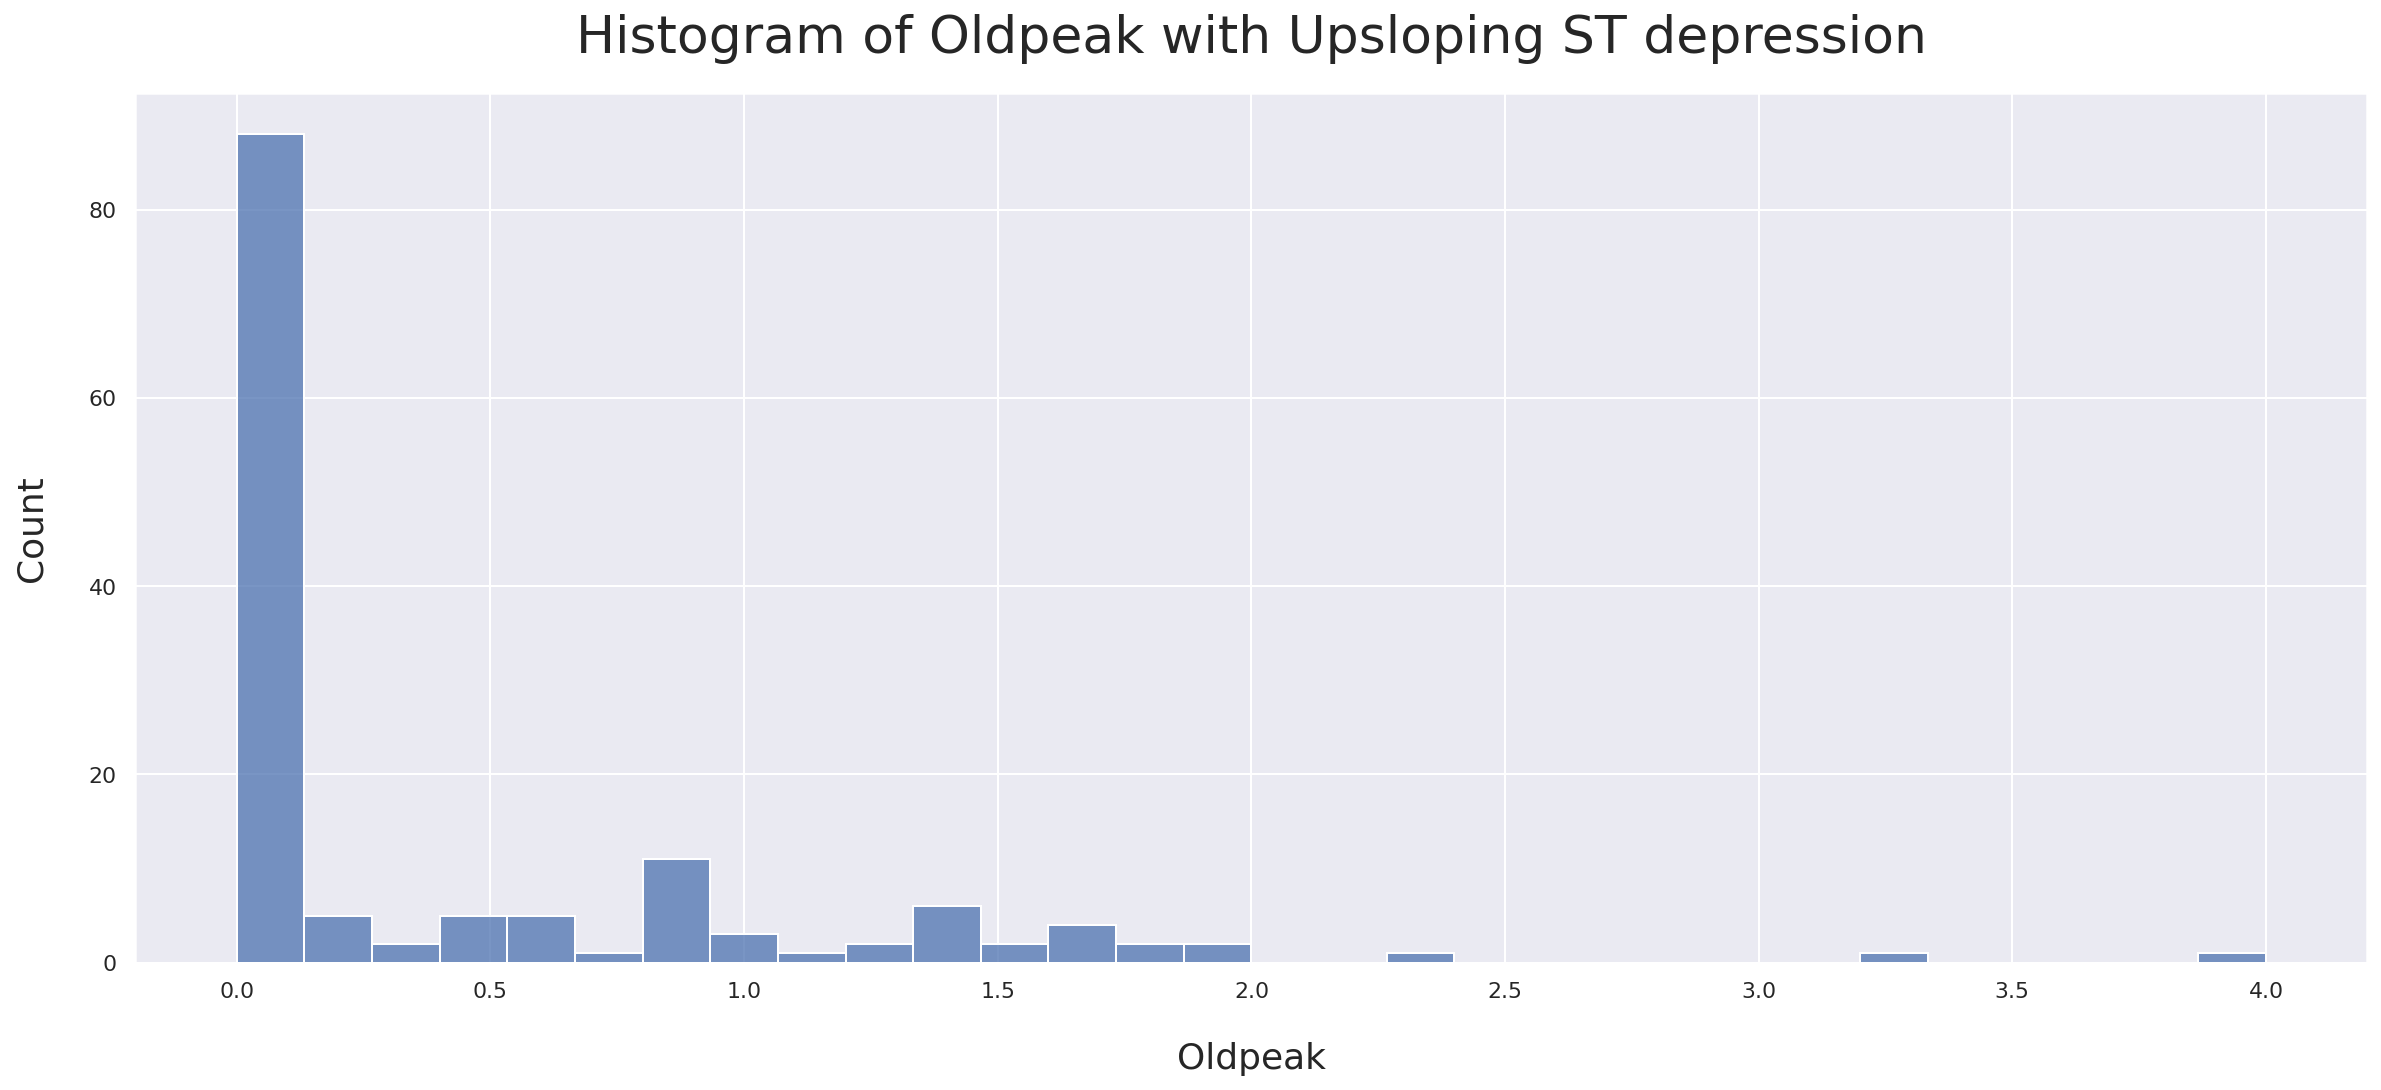

In [28]:
plt.rcParams["figure.figsize"] = (20,8)
sns.histplot(heart_data.oldpeak[heart_data["slope"]=='upsloping'], bins=30)
plt.title("Histogram of Oldpeak with Upsloping ST depression", pad=20, fontsize = 26)
plt.xlabel("Oldpeak", labelpad=20, fontsize = 18)
plt.ylabel("Count", labelpad=20, fontsize = 18)
plt.show()

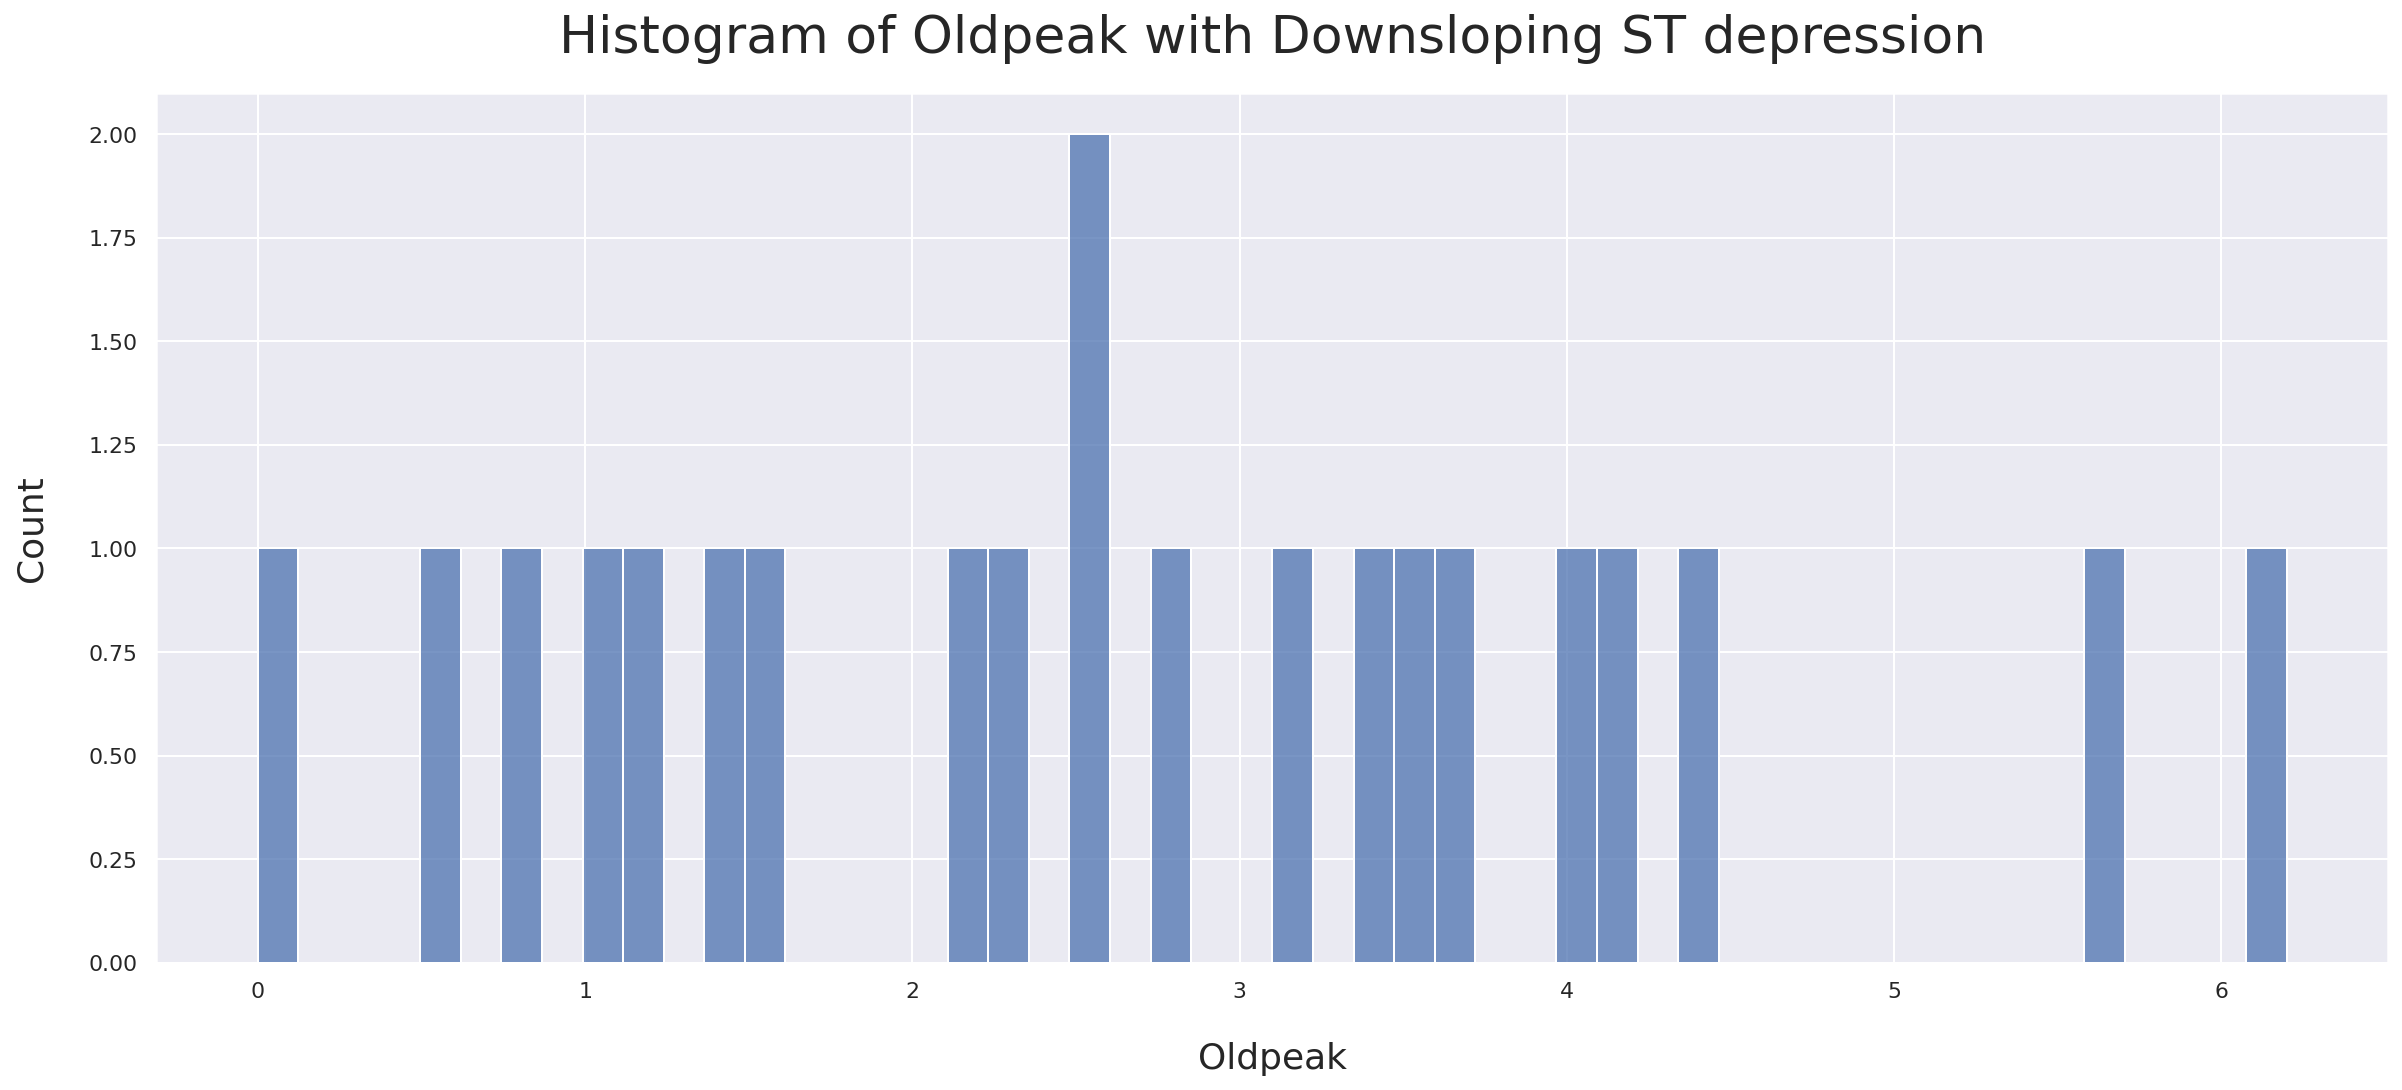

In [29]:
plt.rcParams["figure.figsize"] = (20,8)
sns.histplot(heart_data.oldpeak[heart_data["slope"]=='downsloping'], bins=50)
plt.title("Histogram of Oldpeak with Downsloping ST depression", pad=20, fontsize = 26)
plt.xlabel("Oldpeak", labelpad=20, fontsize = 18)
plt.ylabel("Count", labelpad=20, fontsize = 18)
plt.show()

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">**The ST/Heart Rate slope** is an improved  electrocardiogram criterion for diagnosing Coronary heart disease, by which heart attack is a major symptom. There are not so much insights that can be drawn from the two (2) charts above because there is no pattern as such. However, at **0.1** of [oldpeak/Exercise induced ST segment depression](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1768611/#:~:text=Exercise%20induced%20ST%20segment%20depression,coronary%20artery%20disease%20(CAD).), the [upsloping](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6931502/#:~:text=Upsloping%20ST%20depression%20in%20resting,to%20conditions%20other%20than%20ischemia) is at its peak. It could be further implied that there could be other factors that determine the upsloping or [downsloping](https://pubmed.ncbi.nlm.nih.gov/9201108/#:~:text=Exercise%2Dinduced%20downsloping%20ST%2Dsegment,has%20not%20yet%20been%20clarified) of the ST depression of the heart. 


<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='others'></a>

# <div class="subsubsubsection_title">Additional Mind Maps

<i><p style="font-size:18px; background-color: #DCDCDC; border: 2px solid black; margin: 20px; padding: 20px;">Data visualizations are incremental processes for other **data science** components, such as **machine learning**, among others. I took courses on some Machine learning courses (courtesy of **Kaggle** and **Coursera**) in which I developed mind maps. Below are links to my mind maps on them:
    

# <div class="subsubsection_title"><a href= "https://www.xmind.net/m/7JVHTU" style = "color: white">Intro to Machine Learning<a>
# <div class="subsubsection_title"><a href= "https://www.xmind.net/m/a4FrUr" style = "color: white">Google Cloud Big Data and Machine Learning<a>
# <div class="subsubsection_title"><a href= "https://www.xmind.net/m/L3HLTY" style = "color: white">How Google Does Machine Learning<a>
# <div class="subsubsection_title"><a href= "https://www.xmind.net/m/ZA7cUC" style = "color: white">Launching into Machine Learning<a>    

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='conclusion'></a>
​
----------
​
# <div class="subsection_title">Conclusion

<font size="4">

>To conclude my findings from the seven major questions and sub-questions visualized, I will make some concluding observations.>The dataset utilized for this exploratory data analysis dates far back as **1988** from **Cleveland**, United States, which implies its imperfectness to fully explain to every individual in every country on the possibilities of heart attack. However, insights could be drawn to every individual that reads this notebook on what could lead to a heart attack.
>
>Of the several visualization on the possibilites of the heart attack, it is obvious that **chest pain, ages above 40 years and extreme high cholesterol levels** are key attributes that contribute to a heart attack.
> 
>A unique aspect of this notebook is the inclusion of **links to mind maps** based on my learnings in my data science journey, courtesy, **KaggleX** and my mentor, **Mani Sarkar.**
>
>This notebook will be updated soonest to predict models with machine learning. Please check out my codes again to explore more

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='references'></a>
​
----------
​
# <div class="subsection_title">References

<font size="4">

>Below are references that have aided my notebook to be this amazing:
>* [Canto, John G., et al. "Prevalence, clinical characteristics, and mortality among patients with myocardial infarction presenting without chest pain." Jama 283.24 (2000): 3223-3229](https://jamanetwork.com/journals/jama/article-abstract/192825)
>
>* [Pope, J. Hector, et al. "Clinical features of emergency department patients presenting with symptoms suggestive of acute cardiac ischemia: a multicenter study." Journal of thrombosis and thrombolysis 6 (1998): 63-74](https://link.springer.com/article/10.1023/A:1008876322599)
>
>* [ NHS England. Thalessemia. 2022 October 17](https://www.nhs.uk/conditions/thalassaemia/)
>
>* [Jiang, Shu. "Heart Disease Prediction Using Machine Learning Algorithms." (2020).](https://escholarship.org/uc/item/7977j5cf)
>
>* [World life rankings - Live long live better. WORLD HEALTH ORGANIZATION 2020. ](https://www.worldlifeexpectancy.com/nigeria-coronary-heart-disease#:~:text=According%20to%20the%20latest%20WHO,Nigeria%20%23107%20in%20the%20world.)
>
>* [She speaks data. "Predicting Heart attack — EDA & ML, Datapane & Python." Devgenius (2022)](http://https://blog.devgenius.io/predicting-heart-attack-eda-ml-datapane-pyth-5b28a992d437)
>
>* [Hardik Deshmukh. "Heart Disease UCI-Diagnosis & Prediction." Towards Data science 2020](https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7#:~:text=thal%3A%20A%20blood%20disorder%20called,but%20it%20is%20not%20normal)
>
>* [Mario Caesar. "Data Pre-processing, EDA & Feature Engineering" 2022](https://www.kaggle.com/code/caesarmario/data-pre-processing-eda-feature-engineering)
>
>* https://www.kaggle.com/code/neomatrix369/kaggle-global-outreach-analysis
>
>* https://www.kaggle.com/code/neomatrix369/fastchai-tweet-sentiment-extraction-analysis 
>
>* [Khalid U, Birnbaum Y. Clinical Significance of Upsloping ST Depression on Resting Electrocardiogram. Ann Noninvasive Electrocardiol. 2016 Mar;21(2):202-5](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6931502/#:~:text=Upsloping%20ST%20depression%20in%20resting,to%20conditions%20other%20than%20ischemia)
>
>* [Watanabe T, Harumi K, Akutsu Y, Yamanaka H, Okazaki O, Michihata T, Katagiri T. Significance of downsloping ST-segment depression induced by low-level exercise in severe coronary artery disease. Assessment with myocardial ischemia and collateral perfusion. Jpn Heart J. 1997 Mar;38(2):207-18](https://pubmed.ncbi.nlm.nih.gov/9201108/#:~:text=Exercise%2Dinduced%20downsloping%20ST%2Dsegment,has%20not%20yet%20been%20clarified.)

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>

<a id='credits'></a>
​
----------
​
# <div class="subsection_title">Credits and Thanks

<font size="4">
    
>I give credits to **KaggleX BIPOC Mentorship** organizers for giving me the opportunity to be a mentee and to be able to network with amazing data scientists across the world. 
>
>Thankful for my ever able mentor - [**Mani Sarkar**](https://www.kaggle.com/neomatrix369) for teaching me how to be more organized using [**trello boards**](https://trello.com), [**mind maps**](https://www.mindmaps.com/what-is-mind-mapping) and taking notes. Thanks for every step-by-step process in this notebook and in my great journey as a data scientist.  
>
>I am also grateful to my fellow mentees who have contributed to the success of my submission: [Vannia](https://www.kaggle.com/sordatainesdelacruz), [Claudia](https://www.kaggle.com/clareismo), [Nimah](https://www.kaggle.com/nimahmasuud), [Kehinde](https://www.kaggle.com/kehindeolalekan), [Sesugh](https://www.kaggle.com/captainsesman), [Liliana](https://www.kaggle.com/sophieb), [Millena](https://www.kaggle.com/millenathalyne), [Julia](https://www.kaggle.com/juliasuzuki), [Honoré](https://www.kaggle.com/braintheos), [Sonia](https://www.kaggle.com/clairesonia) and [Chandrakala](https://www.kaggle.com/chandrakalagowda)

<a href='#ToC'><span class="label label-info" style="font-size: 125%">Back to Table of Contents</span></a>